In [1]:
from mkTestData import mkdata

testdata = mkdata('g', [1.5, 0, 2], [-15, 15], 50, 0, 0.1, 'return', 'random')
testdata.xsort()

<ErrorbarContainer object of 3 artists>

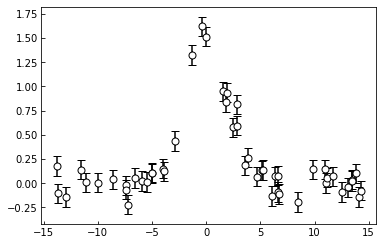

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.errorbar(testdata.data['test'].x, testdata.data['test'].y,
             xerr=testdata.data['test'].xerr, yerr=testdata.data['test'].yerr,
             capsize=4, fmt='o', markersize=7, ecolor='black', markeredgecolor = "black", color='w')

In [3]:
from fittingclass import PriorClass, MetropolisAlgorithm

prior = PriorClass([1, 1, 1], std=[0.1, 0.1, 0.1], cov=None)
mcmc = MetropolisAlgorithm(testdata, function='g', prior=prior)

[2021-12-27 16:49:28,079] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - __init__:3 -> [START] __init__


In [4]:
mcmc.setChain(2000, nchain=3, stepsize=0.3, betastep=[1., 1., 1.])

[2021-12-27 16:49:28,086] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - setChain:1 -> [START] setChain
[2021-12-27 16:49:28,087] INFO	fittingclass.py - setChain:255 -> Seting initial randomly.
[2021-12-27 16:49:28,087] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:260 -> [START] _sampling
[2021-12-27 16:49:28,088] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 15.095    DoF:47    SAMPLE: 0.5237054944258007 1.0731384534412798 1.1193694825276719
[2021-12-27 16:49:28,089] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:260 -> [START] _sampling
[2021-12-27 16:49:28,090] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 12.135    DoF:47    SAMPLE: 1.4766146431484066 0.8697440356861006 0.761613124109337
[2021-12-27 16:49:28,090] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:260 -> [START] _sampling
[2021-12-27 16:49:28,091] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 10.760    DoF:47    SAMPLE: 1.0855465127669142 0.53552617505

In [5]:
mcmc.run(prior=False, outdir='output', multi=True)

[2021-12-27 16:49:28,097] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - run:11 -> [START] run
[2021-12-27 16:49:28,098] WARNING	fittingclass.py - run:486 -> Directory [output] is already exists.
[2021-12-27 16:49:28,109] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,111] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 14.514    DoF:47    SAMPLE: 0.5615724179076692 1.0419188416427734 1.1262145935177172
[2021-12-27 16:49:28,111] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,113] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 14.086    DoF:47    SAMPLE: 0.5839740220443032 0.9425273205481006 1.1326672371572009
[2021-12-27 16:49:28,114] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,115] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 13.982    DoF:47    SAMPLE: 0.6113107582376358 0.95902020

[2021-12-27 16:49:28,187] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 6.277    DoF:47    SAMPLE: 1.0637008606468872 0.7157118077147286 1.37535308244325
[2021-12-27 16:49:28,188] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,189] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 6.048    DoF:47    SAMPLE: 1.0417158230118535 0.6995061343266001 1.430915692873125
[2021-12-27 16:49:28,189] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,190] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 5.879    DoF:47    SAMPLE: 1.0287009189062128 0.6740924148946652 1.4682449782846743
[2021-12-27 16:49:28,191] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,192] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 5.646    DoF:47    SAMPLE: 1.0057442325281614 0.6295371866410695 1.5316175310142452
[2021-12-27 16:49:28,1

[2021-12-27 16:49:28,251] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.748    DoF:47    SAMPLE: 1.486170773588475 0.3418641754299001 1.6879934421656213
[2021-12-27 16:49:28,251] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,253] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.703    DoF:47    SAMPLE: 1.5397997360892461 0.3423916021107351 1.6740590816629781
[2021-12-27 16:49:28,253] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,255] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.648    DoF:47    SAMPLE: 1.5217597562408103 0.31538500748572434 1.6891384733844301
[2021-12-27 16:49:28,256] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,257] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.617    DoF:47    SAMPLE: 1.5511225241091944 0.33668716951966754 1.7238374844940054
[2021-12-27 16:49:

[2021-12-27 16:49:28,306] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.591291216302691 -0.11157618181126015 1.829977633659327
[2021-12-27 16:49:28,307] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,308] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.5506170620893958 -0.11889959317140293 1.8802903604706704
[2021-12-27 16:49:28,309] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,309] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.5559652203228416 -0.1337445463382221 1.8970778697385047
[2021-12-27 16:49:28,310] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,311] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.215    DoF:47    SAMPLE: 1.5266261574669415 -0.1308329380205111 1.890305757058188
[2021-12-27 16:4

[2021-12-27 16:49:28,357] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.215    DoF:47    SAMPLE: 1.5392392480557588 0.08622020278602235 1.9778029211608619
[2021-12-27 16:49:28,358] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,359] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5243165930414058 0.013774448939452311 1.9698785366994134
[2021-12-27 16:49:28,360] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,361] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.486673786086996 -0.03596907879587777 1.9894099971096886
[2021-12-27 16:49:28,361] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,362] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.514196373702823 -0.01515130725637917 1.9907880146443284
[2021-12-27 16

[2021-12-27 16:49:28,413] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.198    DoF:47    SAMPLE: 1.5739953833240263 -0.07212209035573636 2.0082422516838885
[2021-12-27 16:49:28,414] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,415] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.549178207237646 -0.06972258486450589 1.9814241849635488
[2021-12-27 16:49:28,416] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,418] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.5500352977988332 -0.07403435255309915 1.9947749238361414
[2021-12-27 16:49:28,418] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,419] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5244967870391237 -0.07661471119559227 1.9587411715648029
[2021-12-27 

[2021-12-27 16:49:28,464] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.438105259436865 -0.016132628897362312 1.9840066723271441
[2021-12-27 16:49:28,465] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,466] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.173    DoF:47    SAMPLE: 1.4802649530380538 0.019943468855688092 1.9242560004106501
[2021-12-27 16:49:28,467] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,468] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.467985321927687 -0.021850954271631605 1.9823789922806487
[2021-12-27 16:49:28,469] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,470] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.4747601205470606 -0.036164609002854356 1.9271254943969454
[2021-12-2

[2021-12-27 16:49:28,516] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.227    DoF:47    SAMPLE: 1.627673973123998 0.08589454537418295 1.8166284800377674
[2021-12-27 16:49:28,517] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,518] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.259    DoF:47    SAMPLE: 1.5915633413131944 0.05742596533487337 1.755180087242719
[2021-12-27 16:49:28,519] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,520] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.233    DoF:47    SAMPLE: 1.579257739857952 0.04128762028684718 1.7767045552213556
[2021-12-27 16:49:28,520] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,521] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.284    DoF:47    SAMPLE: 1.5734899501205228 0.11079765173256072 1.7532516364457873
[2021-12-27 16:49:

[2021-12-27 16:49:28,608] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.190    DoF:47    SAMPLE: 1.5576329264437185 -0.06304845379169358 1.844044674686228
[2021-12-27 16:49:28,609] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,610] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.187    DoF:47    SAMPLE: 1.5424912176697645 -0.09532633447306166 1.876030274989275
[2021-12-27 16:49:28,610] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,611] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5788363939565455 -0.0686539168651666 1.8700212568742112
[2021-12-27 16:49:28,611] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,612] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5594854210650677 -0.059991949929869406 1.901115179225683
[2021-12-27 16

[2021-12-27 16:49:28,662] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.278    DoF:47    SAMPLE: 1.4548986301141174 -0.0025681095559449254 1.8622436746397117
[2021-12-27 16:49:28,662] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,663] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.4680418756395976 -0.00011431929827233032 1.9263656021862268
[2021-12-27 16:49:28,664] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,665] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.253    DoF:47    SAMPLE: 1.4431426555537643 -0.025482039995947545 1.905495021823544
[2021-12-27 16:49:28,666] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,667] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.273    DoF:47    SAMPLE: 1.4441580825853544 -0.04157249285892209 1.8936460780364357
[2021-

[2021-12-27 16:49:28,718] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.5307443113912527 -0.011801063867747522 1.8599515256776087
[2021-12-27 16:49:28,718] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,719] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5702259294786483 0.0279041273197562 1.8868391575074133
[2021-12-27 16:49:28,720] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,721] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5737841009684885 -0.003939814822004617 1.8565518978737547
[2021-12-27 16:49:28,721] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,722] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5738010290711735 -0.030060474746680665 1.8781243486818529
[2021-12-2

[2021-12-27 16:49:28,772] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.262    DoF:47    SAMPLE: 1.4192113947410359 -0.03323075235753303 1.9503689190155606
[2021-12-27 16:49:28,773] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,774] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.248    DoF:47    SAMPLE: 1.4299991098349136 -0.017206068976801152 1.9342233269730504
[2021-12-27 16:49:28,774] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,775] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.225    DoF:47    SAMPLE: 1.4492859245991934 -0.007290434696798798 1.9156334190423345
[2021-12-27 16:49:28,776] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,777] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.4426292027685603 -0.028371126099503558 1.954668410700784
[2021-12-

[2021-12-27 16:49:28,883] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.5299446707324789 -0.056891373315760455 1.9769856618596346
[2021-12-27 16:49:28,883] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,884] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.4793023166946309 -0.05590879741531442 1.9549133643345382
[2021-12-27 16:49:28,885] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,886] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.220    DoF:47    SAMPLE: 1.462275549982423 -0.07367672835222613 1.9253505003250664
[2021-12-27 16:49:28,886] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:28,887] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.310    DoF:47    SAMPLE: 1.418038369769058 -0.07480866713057226 1.9289122045991745
[2021-12-27 

[2021-12-27 16:49:29,020] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.173    DoF:47    SAMPLE: 1.5828185601849463 0.05568892689268819 1.897248312620083
[2021-12-27 16:49:29,022] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,024] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.187    DoF:47    SAMPLE: 1.5748273686130547 0.07604377313110304 1.837537892008792
[2021-12-27 16:49:29,025] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,028] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.5910953173516358 0.09009746428500537 1.8261037699391651
[2021-12-27 16:49:29,029] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,031] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.201    DoF:47    SAMPLE: 1.6205894235154383 0.03527881387965164 1.809101724056487
[2021-12-27 16:49:

[2021-12-27 16:49:29,081] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.5779614429928337 0.05247050767047421 1.8743860540299047
[2021-12-27 16:49:29,082] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,083] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.255    DoF:47    SAMPLE: 1.6200517595168606 0.09461728994825032 1.8999046517612048
[2021-12-27 16:49:29,084] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,085] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.6016174315366762 0.0851381170972278 1.8840563232512961
[2021-12-27 16:49:29,086] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,087] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.212    DoF:47    SAMPLE: 1.6183068679167225 0.0801183773981993 1.832821906990744
[2021-12-27 16:49:

[2021-12-27 16:49:29,132] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.210    DoF:47    SAMPLE: 1.5576008059376751 -0.0008981550520377829 1.8073883236203643
[2021-12-27 16:49:29,133] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,134] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.5235791383077535 0.02286935534037606 1.8476908407553354
[2021-12-27 16:49:29,135] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,136] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.5648400538808314 0.03293958186681613 1.8279110949001756
[2021-12-27 16:49:29,137] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,139] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.589972024386199 0.05543047795594167 1.851667595119131
[2021-12-27 16

[2021-12-27 16:49:29,189] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.273    DoF:47    SAMPLE: 1.5550656047068818 -0.18940133667288417 1.8796676038080666
[2021-12-27 16:49:29,189] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,190] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.304    DoF:47    SAMPLE: 1.5598385022281758 -0.21935448249028427 1.887678591017361
[2021-12-27 16:49:29,191] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,192] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.304    DoF:47    SAMPLE: 1.5998682631245065 -0.20485393125577167 1.858560401261494
[2021-12-27 16:49:29,192] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,193] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.412    DoF:47    SAMPLE: 1.5752045140789654 -0.24573047866201764 1.83843283632849
[2021-12-27 16:

[2021-12-27 16:49:29,293] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.268    DoF:47    SAMPLE: 1.5573575406482547 -0.22819485039534212 1.9971522138861677
[2021-12-27 16:49:29,294] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,294] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.259    DoF:47    SAMPLE: 1.56883686444903 -0.19344855841957284 2.027949634426232
[2021-12-27 16:49:29,295] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,296] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.273    DoF:47    SAMPLE: 1.5760096735856222 -0.150182132728742 2.0547275015354374
[2021-12-27 16:49:29,296] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,297] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.253    DoF:47    SAMPLE: 1.5624505701193496 -0.21253219290177336 1.9968907102181828
[2021-12-27 16:4

[2021-12-27 16:49:29,349] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.175    DoF:47    SAMPLE: 1.473645662955207 0.0424464515589006 1.9703122775743607
[2021-12-27 16:49:29,350] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,351] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.199    DoF:47    SAMPLE: 1.4601749911287019 0.04357507519577447 1.9281028833308778
[2021-12-27 16:49:29,352] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,353] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.4524705060967749 0.050610428760477014 1.9385237593454627
[2021-12-27 16:49:29,354] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,355] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.215    DoF:47    SAMPLE: 1.4677334112503437 0.054635051838821294 1.892628789576319
[2021-12-27 16:4

[2021-12-27 16:49:29,401] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.226    DoF:47    SAMPLE: 1.6299773755505536 0.03551216090754994 1.9111547460449902
[2021-12-27 16:49:29,402] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,402] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.216    DoF:47    SAMPLE: 1.6102108948819394 -0.0007576975423618627 1.9577340534243053
[2021-12-27 16:49:29,403] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,404] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.260    DoF:47    SAMPLE: 1.623583559633292 0.04553658711225514 1.9451491010899915
[2021-12-27 16:49:29,404] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,405] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.272    DoF:47    SAMPLE: 1.6411655694459115 0.058123918117834905 1.9153309897197115
[2021-12-27 

[2021-12-27 16:49:29,452] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.217    DoF:47    SAMPLE: 1.6565328233057472 -0.0033262698397799606 1.8350497195631865
[2021-12-27 16:49:29,453] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,454] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.242    DoF:47    SAMPLE: 1.6645486979483781 0.009889284363364248 1.7914981936436936
[2021-12-27 16:49:29,455] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,456] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.203    DoF:47    SAMPLE: 1.6118305305269 0.035116755336022855 1.8008199542056085
[2021-12-27 16:49:29,457] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,458] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.5860833178853548 0.046588601383709564 1.8580760258824771
[2021-12-27 

[2021-12-27 16:49:29,560] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.5954210040361434 -0.17963478555858564 1.8956674849420811
[2021-12-27 16:49:29,561] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,562] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.592661556557475 -0.13079708840786594 1.8903537570467337
[2021-12-27 16:49:29,562] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,564] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.5773477369160172 -0.12939159657172583 1.9291276655124538
[2021-12-27 16:49:29,565] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,566] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5910186017282921 -0.08775824295061761 1.9302852391793046
[2021-12-27 

[2021-12-27 16:49:29,614] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.5052245686128847 0.03518371203438908 2.0374602703774753
[2021-12-27 16:49:29,614] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,616] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.216    DoF:47    SAMPLE: 1.5217057270614027 0.014681470888892493 2.0448421169838524
[2021-12-27 16:49:29,617] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,618] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.236    DoF:47    SAMPLE: 1.528696790558035 0.013831777755004528 2.0543607698898323
[2021-12-27 16:49:29,619] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,620] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.225    DoF:47    SAMPLE: 1.5357335957787408 -0.012462902143038364 2.0518137351023635
[2021-12-27 

[2021-12-27 16:49:29,666] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5924573798027641 -0.030397001898813003 1.9123865944541667
[2021-12-27 16:49:29,667] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,668] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5283664091751223 -0.034199092846446504 1.8856396242226663
[2021-12-27 16:49:29,669] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,670] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5468243644365876 -0.017269648587470484 1.8706619981379895
[2021-12-27 16:49:29,671] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,672] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5533802138331918 -0.015972740630909685 1.8812793919927984
[2021-1

[2021-12-27 16:49:29,717] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.6103306528892494 0.05079904472911426 1.8597300410238349
[2021-12-27 16:49:29,719] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,720] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.175    DoF:47    SAMPLE: 1.6168039566337353 0.008307086594212398 1.8547032952151081
[2021-12-27 16:49:29,721] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,723] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.264    DoF:47    SAMPLE: 1.6763091909740806 0.01677846536033689 1.8613998006807333
[2021-12-27 16:49:29,724] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,726] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.189    DoF:47    SAMPLE: 1.6239293795518073 0.027666823684847876 1.8384171876521624
[2021-12-27 1

[2021-12-27 16:49:29,830] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5515190172798323 -0.09997749706188802 1.8868386609180672
[2021-12-27 16:49:29,830] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,831] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.195    DoF:47    SAMPLE: 1.5006472389837304 -0.094734190577168 1.90831556536547
[2021-12-27 16:49:29,832] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,832] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.559067896832031 -0.11672063061580613 1.8833083045870618
[2021-12-27 16:49:29,833] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,834] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.558674660959526 -0.12051484821311563 1.8988611946816971
[2021-12-27 16:49

[2021-12-27 16:49:29,878] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5632298744299804 -0.09862414720857429 1.9507889701190941
[2021-12-27 16:49:29,879] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,880] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5445335944845107 -0.07204482663236111 1.899219370550985
[2021-12-27 16:49:29,881] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,882] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.5777235881278706 -0.09706569800647438 1.9122635343868994
[2021-12-27 16:49:29,883] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,884] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.195    DoF:47    SAMPLE: 1.6029076381348348 -0.03887203930004789 1.963744412635412
[2021-12-27 1

[2021-12-27 16:49:29,931] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.4905704429971158 -0.0559373363369186 2.048653688361482
[2021-12-27 16:49:29,931] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,933] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.4665911188200225 0.017465828660062944 2.0573919690857827
[2021-12-27 16:49:29,934] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,935] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.256    DoF:47    SAMPLE: 1.411399016747067 0.000507427958150386 2.08479780019581
[2021-12-27 16:49:29,935] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,936] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.301    DoF:47    SAMPLE: 1.4720224479200061 -0.0027353027854669504 2.134526935091234
[2021-12-27 16:

[2021-12-27 16:49:29,984] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.171    DoF:47    SAMPLE: 1.478980651447272 -0.057354555927189015 2.0244177219275903
[2021-12-27 16:49:29,984] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,986] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.487894657939443 -0.025066145616448928 2.0128234374789167
[2021-12-27 16:49:29,987] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,988] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.450841062095607 -0.0339516612872136 2.0394521519016666
[2021-12-27 16:49:29,989] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:29,990] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.4384957298896357 -0.026158812554185142 2.0421023260715154
[2021-12-27 

[2021-12-27 16:49:30,091] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.565293618232382 -0.06920104308547875 1.9347470351304297
[2021-12-27 16:49:30,092] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,093] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.5521908455753595 -0.14356235908328754 1.9809678991970097
[2021-12-27 16:49:30,093] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,094] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5195900434130944 -0.07057083801792412 1.9818703456288782
[2021-12-27 16:49:30,095] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,096] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.5305366291673583 -0.07150481404280382 1.9924749800628991
[2021-12-27 

[2021-12-27 16:49:30,141] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.225    DoF:47    SAMPLE: 1.6266950417729313 0.03728778603245473 1.7810834051918665
[2021-12-27 16:49:30,142] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,143] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.284    DoF:47    SAMPLE: 1.5749134258761417 0.003932455359222625 1.7528400366719579
[2021-12-27 16:49:30,144] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,145] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.303    DoF:47    SAMPLE: 1.5573990409960234 -0.023693493002264962 1.7598287289953056
[2021-12-27 16:49:30,145] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,146] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.369    DoF:47    SAMPLE: 1.5732615224032216 -0.0034322566220926446 1.7171624972421542
[2021-12-

[2021-12-27 16:49:30,193] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.208    DoF:47    SAMPLE: 1.4703352647952 0.09695342785662986 1.9601904465045952
[2021-12-27 16:49:30,194] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,195] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.4833674548241633 0.0822098848018753 1.9802941171255537
[2021-12-27 16:49:30,195] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,196] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.226    DoF:47    SAMPLE: 1.5019661210175563 0.08703476520414749 2.0139000072358506
[2021-12-27 16:49:30,197] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,198] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.219    DoF:47    SAMPLE: 1.5057046695787935 0.10378726609819196 1.984319548550069
[2021-12-27 16:49:30

[2021-12-27 16:49:30,244] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.280    DoF:47    SAMPLE: 1.5616756640452074 0.014545786885230573 1.7594197188889364
[2021-12-27 16:49:30,245] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,245] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.257    DoF:47    SAMPLE: 1.5856087629068414 -0.007762930479515049 1.7661195080123673
[2021-12-27 16:49:30,246] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,247] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.262    DoF:47    SAMPLE: 1.5664594119133541 -0.02487682292128457 1.7758391123933075
[2021-12-27 16:49:30,247] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,249] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.5740059277535194 -0.008285126920136618 1.8117217655049107
[2021-12-

[2021-12-27 16:49:30,351] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.5945859694616868 -0.030255426364395738 1.929477785221855
[2021-12-27 16:49:30,351] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,352] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.623589902798604 -0.018274546995427538 1.8937271616289135
[2021-12-27 16:49:30,353] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,354] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.6140333595873875 0.011026279485546426 1.8960484900201982
[2021-12-27 16:49:30,354] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,356] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.621660690714926 -0.01649910459717111 1.8897950563055375
[2021-12-27 

[2021-12-27 16:49:30,404] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.268    DoF:47    SAMPLE: 1.6462203638579997 -0.08664493176082601 1.7860442560728438
[2021-12-27 16:49:30,404] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,406] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.289    DoF:47    SAMPLE: 1.6767025816608123 -0.06823252809218791 1.7738732772909487
[2021-12-27 16:49:30,406] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,407] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.322    DoF:47    SAMPLE: 1.681973969535211 -0.028817614750782594 1.734590732057962
[2021-12-27 16:49:30,407] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,409] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.339    DoF:47    SAMPLE: 1.7165058344477142 0.03927374404010273 1.7520173204074265
[2021-12-27 1

[2021-12-27 16:49:30,454] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.4961943386287169 -0.07565037367250523 1.9947052733196173
[2021-12-27 16:49:30,455] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,456] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.509635498719678 -0.12283308373370105 1.9872154782293585
[2021-12-27 16:49:30,457] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,458] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.5279978937338003 -0.12790595076852213 1.9725945101476414
[2021-12-27 16:49:30,458] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,459] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5394204789548047 -0.10380062110311608 1.9477367628545794
[2021-12-27 

[2021-12-27 16:49:30,506] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.301    DoF:47    SAMPLE: 1.5622210262213923 -0.1540934439031638 2.0854053894195896
[2021-12-27 16:49:30,506] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,507] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.246    DoF:47    SAMPLE: 1.5809332738902113 -0.13067793739513706 2.0346113046816314
[2021-12-27 16:49:30,507] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,508] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.255    DoF:47    SAMPLE: 1.6129696808926444 -0.09016084788156167 2.00531564866201
[2021-12-27 16:49:30,509] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,509] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.222    DoF:47    SAMPLE: 1.5926725296330222 -0.12086933516446502 2.0027570919842357
[2021-12-27 16

[2021-12-27 16:49:30,647] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.174    DoF:47    SAMPLE: 1.4796448455717546 -0.03623293260974857 1.9306050464157072
[2021-12-27 16:49:30,648] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,649] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.5257179225866944 -0.06143223887633212 1.9355250416585825
[2021-12-27 16:49:30,650] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,653] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.5104489716981884 -0.06852577779503169 1.93658645827496
[2021-12-27 16:49:30,653] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,655] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.513896725753325 -0.07971882630151228 1.926793922909505
[2021-12-27 16:

[2021-12-27 16:49:30,846] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.217    DoF:47    SAMPLE: 1.5401751557909664 -0.07753230540994738 1.841180981435535
[2021-12-27 16:49:30,847] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,848] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5647455477835028 -0.06738564985529165 1.8950362202641846
[2021-12-27 16:49:30,850] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,863] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5540013565104123 -0.047271568230020905 1.9709553361376793
[2021-12-27 16:49:30,876] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,879] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5370991763935486 -0.01384956641399724 1.9865065853455477
[2021-12-27

[2021-12-27 16:49:30,984] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.219    DoF:47    SAMPLE: 1.51824589490276 -0.058588640947567786 2.07153849000758
[2021-12-27 16:49:30,985] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,986] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.212    DoF:47    SAMPLE: 1.4582715207699906 -0.050625420037799254 2.0773892561095066
[2021-12-27 16:49:30,987] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,988] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.210    DoF:47    SAMPLE: 1.4747981157368275 -0.06905416179142382 2.078654592859883
[2021-12-27 16:49:30,988] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:30,989] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.201    DoF:47    SAMPLE: 1.4862404904866346 -0.09599597463139159 2.064523240883601
[2021-12-27 16:

[2021-12-27 16:49:31,057] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.4813043906616714 -0.06910572382826706 1.9947978862689515
[2021-12-27 16:49:31,058] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,060] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.5138529660383346 -0.06166270787891707 1.9275337121141058
[2021-12-27 16:49:31,060] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,061] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.5026419834256999 -0.07411742327935723 1.9346523078705518
[2021-12-27 16:49:31,062] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,063] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5308041462359627 -0.06737899714562477 1.976693942054914
[2021-12-27 

[2021-12-27 16:49:31,113] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.174    DoF:47    SAMPLE: 1.5370985213206703 -0.10217827891785386 2.0133643217561823
[2021-12-27 16:49:31,114] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,115] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.174    DoF:47    SAMPLE: 1.558696996099438 -0.09757116725630342 1.9959322935144177
[2021-12-27 16:49:31,116] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,118] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.185    DoF:47    SAMPLE: 1.6043431404170052 -0.07075634706349446 1.9531325062288287
[2021-12-27 16:49:31,118] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,119] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.142    DoF:47    SAMPLE: 1.5495408563956097 -0.04691250991074675 1.9051893149838919
[2021-12-27 

[2021-12-27 16:49:31,166] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.235    DoF:47    SAMPLE: 1.4642558210159746 0.012783154067444789 2.0851287460821655
[2021-12-27 16:49:31,167] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,168] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.263    DoF:47    SAMPLE: 1.4463857269915528 0.0168098957773946 2.1070592391845344
[2021-12-27 16:49:31,168] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,170] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.4670549880528636 0.015831234768020643 2.0188888699611574
[2021-12-27 16:49:31,171] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,172] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.4694504732724347 0.03713664316918522 2.0031041187232863
[2021-12-27 16

[2021-12-27 16:49:31,219] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.329    DoF:47    SAMPLE: 1.3780335634830108 -0.02292031836221277 2.1378198456885387
[2021-12-27 16:49:31,219] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,220] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.339    DoF:47    SAMPLE: 1.3666947650080323 -0.07489103438264652 2.0990976908100194
[2021-12-27 16:49:31,221] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,222] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.394    DoF:47    SAMPLE: 1.3422550260655577 -0.03637342368131435 2.050756026647485
[2021-12-27 16:49:31,222] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,224] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.452    DoF:47    SAMPLE: 1.3203615898580257 0.003548033252487881 2.053760528111476
[2021-12-27 1

[2021-12-27 16:49:31,270] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5040266468881514 0.0008116389388981064 1.9393296874554462
[2021-12-27 16:49:31,270] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,271] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.5272385109151987 0.039514320706584755 1.989246797129258
[2021-12-27 16:49:31,272] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,273] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.5241389455504286 0.029240053304801984 2.0262589863344327
[2021-12-27 16:49:31,273] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,274] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.49610430876296 0.06829816504921037 1.9932631178468363
[2021-12-27 16

[2021-12-27 16:49:31,316] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5392698983684832 -0.06736422956192095 1.9046035212859735
[2021-12-27 16:49:31,316] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,317] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.566417322159741 -0.056519966085409795 1.8992708650503585
[2021-12-27 16:49:31,318] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,319] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.585661561795094 -0.019659023999917025 1.8725580288582393
[2021-12-27 16:49:31,320] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,321] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.6279735905675243 -0.03489799815951387 1.8181272573241385
[2021-12-27

[2021-12-27 16:49:31,611] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.491604580092789 -0.04434627944905662 2.0448678354560896
[2021-12-27 16:49:31,647] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,656] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.4935405801873325 -0.012372180903966124 2.048177378571095
[2021-12-27 16:49:31,659] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,667] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.5186641361605737 -0.004716789805018136 2.027489117435968
[2021-12-27 16:49:31,673] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,678] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.493676552156444 -0.04391169438049369 1.9996503705463728
[2021-12-27 1

[2021-12-27 16:49:31,782] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.242    DoF:47    SAMPLE: 1.5341785895641655 -0.128887987204343 2.074583996569864
[2021-12-27 16:49:31,783] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,786] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.258    DoF:47    SAMPLE: 1.5473609732292177 -0.1480213783927402 2.0712950065613582
[2021-12-27 16:49:31,787] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,788] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.222    DoF:47    SAMPLE: 1.538241582427446 -0.18578429826684872 2.010047977195608
[2021-12-27 16:49:31,789] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,790] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.254    DoF:47    SAMPLE: 1.5347680060548088 -0.21668175398208422 2.0138307755681057
[2021-12-27 16:49

[2021-12-27 16:49:31,843] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.360    DoF:47    SAMPLE: 1.5248788769677935 -0.2914728970977129 2.0208281922909648
[2021-12-27 16:49:31,843] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,844] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.260    DoF:47    SAMPLE: 1.5105927265042203 -0.215579468450977 2.033211295767906
[2021-12-27 16:49:31,845] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,846] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.245    DoF:47    SAMPLE: 1.5036473204742131 -0.19787300304997824 2.0384005540458987
[2021-12-27 16:49:31,846] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,848] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.5110669205526972 -0.1999866806318924 1.9969268499556827
[2021-12-27 16:4

[2021-12-27 16:49:31,910] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5270142905273338 -0.004403782028713441 1.970378225281702
[2021-12-27 16:49:31,910] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,912] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.5117338520853059 -0.006904777063535985 1.9990818863087598
[2021-12-27 16:49:31,913] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,916] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.5142383993597228 -0.013744892182427804 2.041813852947905
[2021-12-27 16:49:31,917] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,920] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.5654609943217956 -0.02625577152294352 2.0168054133312663
[2021-12-2

[2021-12-27 16:49:31,984] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.244    DoF:47    SAMPLE: 1.5235830452130408 -0.19955600521172293 1.9529808961252102
[2021-12-27 16:49:31,985] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,987] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.218    DoF:47    SAMPLE: 1.527035633522361 -0.18087651401256744 1.9575578667181188
[2021-12-27 16:49:31,988] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,990] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.249    DoF:47    SAMPLE: 1.5026786791235922 -0.1870129777351358 1.9478242523408238
[2021-12-27 16:49:31,991] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:31,993] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.273    DoF:47    SAMPLE: 1.455121916770355 -0.1586570173621149 1.9591778108572773
[2021-12-27 16:

[2021-12-27 16:49:32,077] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.6004166084830462 -0.04234665956016703 1.9277983827865222
[2021-12-27 16:49:32,078] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,080] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5042999270585062 -0.0314719624234383 1.911660638421789
[2021-12-27 16:49:32,082] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,084] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.4899852612043494 -0.023371050186300306 1.9414649938831812
[2021-12-27 16:49:32,085] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,086] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.47888970177149 -0.02806605290367256 1.9568509875306028
[2021-12-27 16

[2021-12-27 16:49:32,157] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.5139478448564578 -0.03269152398290747 1.9097531455171664
[2021-12-27 16:49:32,158] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,160] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.138    DoF:47    SAMPLE: 1.5459238564750273 -0.049926271828826425 1.9271998098463994
[2021-12-27 16:49:32,161] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,162] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.140    DoF:47    SAMPLE: 1.5453382663259438 -0.06225548536498894 1.9449633854013824
[2021-12-27 16:49:32,163] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,164] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.5198785163043587 -0.09098432642974606 2.03065117349652
[2021-12-27 

[2021-12-27 16:49:32,223] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.282    DoF:47    SAMPLE: 1.4974838374607662 -0.21130027990747619 2.079128496039505
[2021-12-27 16:49:32,224] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,225] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.243    DoF:47    SAMPLE: 1.5298941003764581 -0.16756064730559686 2.0632449423985784
[2021-12-27 16:49:32,225] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,226] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.260    DoF:47    SAMPLE: 1.5336045642683267 -0.16874058416978768 2.075269790386531
[2021-12-27 16:49:32,227] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,228] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.255    DoF:47    SAMPLE: 1.4797758868941204 -0.1892249324829626 2.062484170001111
[2021-12-27 16:

[2021-12-27 16:49:32,314] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.322    DoF:47    SAMPLE: 1.6367843018986372 -0.231844496472766 1.9205813390811135
[2021-12-27 16:49:32,316] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,318] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.301    DoF:47    SAMPLE: 1.6306553555383774 -0.21892358143649263 1.9419917611731226
[2021-12-27 16:49:32,319] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,321] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.338    DoF:47    SAMPLE: 1.665093306448544 -0.20627020413483274 1.9361855759733277
[2021-12-27 16:49:32,322] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,324] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.335    DoF:47    SAMPLE: 1.6558590914386728 -0.2070435216599368 1.9557562786207723
[2021-12-27 16:

[2021-12-27 16:49:32,392] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.199    DoF:47    SAMPLE: 1.5685778735082634 -0.13268793603685913 2.0034790802075855
[2021-12-27 16:49:32,392] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,393] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.189    DoF:47    SAMPLE: 1.5592958727416595 -0.15332284015288314 1.966466938925807
[2021-12-27 16:49:32,394] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,395] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.5644403737048416 -0.16397029735385385 1.9980791756324745
[2021-12-27 16:49:32,396] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,397] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.224    DoF:47    SAMPLE: 1.5999716056722597 -0.17248542292422941 1.948039335670226
[2021-12-27 1

[2021-12-27 16:49:32,467] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.5993438576652137 -0.04308869966470225 1.8876929882218167
[2021-12-27 16:49:32,468] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,470] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.187    DoF:47    SAMPLE: 1.5518160836665578 -0.07627294814315506 1.8567356783500744
[2021-12-27 16:49:32,471] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,472] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.562921745497933 -0.05466725511692072 1.8955666569779206
[2021-12-27 16:49:32,473] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,474] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5845404681609285 -0.0197377712746845 1.8657519862310765
[2021-12-27 1

[2021-12-27 16:49:32,607] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.241    DoF:47    SAMPLE: 1.419545047130799 0.05552734033344714 1.9916779052582578
[2021-12-27 16:49:32,614] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,620] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.4428820371908282 0.05764966835692025 1.9922311215642172
[2021-12-27 16:49:32,625] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,631] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.494477536707383 0.01650283834053409 2.0027152514217454
[2021-12-27 16:49:32,635] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,639] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.5078642466356 0.029665179272830824 2.012897951276686
[2021-12-27 16:49:32

[2021-12-27 16:49:32,698] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.227    DoF:47    SAMPLE: 1.5764279409493396 -0.008173467661973128 1.787867650075731
[2021-12-27 16:49:32,699] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,701] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.203    DoF:47    SAMPLE: 1.5705293814828512 -0.05136162258450849 1.8217746078211086
[2021-12-27 16:49:32,702] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,703] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.6221891704681815 -0.0393708645731925 1.8274087650616417
[2021-12-27 16:49:32,704] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,705] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.5968858752401083 -0.047679079661852634 1.8627201356865482
[2021-12-27

[2021-12-27 16:49:32,762] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.266    DoF:47    SAMPLE: 1.614731256236176 0.1306874298830588 1.865638549918967
[2021-12-27 16:49:32,763] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,764] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.297    DoF:47    SAMPLE: 1.5892171429478958 0.16512226717257714 1.891060659679435
[2021-12-27 16:49:32,766] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,768] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.582673932071683 0.08107716005193927 1.9561377408121132
[2021-12-27 16:49:32,769] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,770] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.400    DoF:47    SAMPLE: 1.5397124411832843 0.15151637151082858 2.0427318048360115
[2021-12-27 16:49:32

[2021-12-27 16:49:32,833] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.243    DoF:47    SAMPLE: 1.442238149575491 0.0949288909027271 2.0185410683073797
[2021-12-27 16:49:32,834] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,835] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.230    DoF:47    SAMPLE: 1.4381532862864623 0.06999818591709826 2.02294180084206
[2021-12-27 16:49:32,836] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,837] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.230    DoF:47    SAMPLE: 1.4217653646443185 0.03298402346813786 1.994368137785526
[2021-12-27 16:49:32,838] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,839] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.4461140128318382 0.03168552228009813 1.9894886764705193
[2021-12-27 16:49:32

[2021-12-27 16:49:32,907] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.5422473101346228 -0.09250598111803604 1.8937247175240666
[2021-12-27 16:49:32,911] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,913] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.56363959554938 -0.09089624958296916 1.8727578054374836
[2021-12-27 16:49:32,916] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,920] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.6154537480561677 -0.04112310896111168 1.8711200947984072
[2021-12-27 16:49:32,921] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,924] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.212    DoF:47    SAMPLE: 1.6527635452998624 -0.05497237926027032 1.852030678989995
[2021-12-27 16

[2021-12-27 16:49:32,997] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5725210433459988 -0.09824614041801626 1.9425317017154342
[2021-12-27 16:49:32,998] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:32,999] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.175    DoF:47    SAMPLE: 1.6001596384177745 -0.09490600242142645 1.9345671831841582
[2021-12-27 16:49:33,001] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,002] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.227    DoF:47    SAMPLE: 1.6277913707884704 -0.12315387499366076 1.9503778273789938
[2021-12-27 16:49:33,003] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,005] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.231    DoF:47    SAMPLE: 1.6199222689082207 -0.12603040112783853 1.969203128015159
[2021-12-27 

[2021-12-27 16:49:33,075] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.4622164153456692 -0.025552292720871523 1.9364332268940452
[2021-12-27 16:49:33,076] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,077] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.255    DoF:47    SAMPLE: 1.4288764206199698 -0.01196966270991546 1.927911945735154
[2021-12-27 16:49:33,077] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,078] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.216    DoF:47    SAMPLE: 1.4484521982540999 -0.04719780406075069 1.9419427448501336
[2021-12-27 16:49:33,079] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,080] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.480538140372642 -0.08290298724733147 1.9513130729732522
[2021-12-27 

[2021-12-27 16:49:33,131] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.244    DoF:47    SAMPLE: 1.4268162436354246 0.01833987906699398 1.940116519457976
[2021-12-27 16:49:33,132] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,134] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.257    DoF:47    SAMPLE: 1.4138849200055823 0.024291905066270065 1.9591768468901887
[2021-12-27 16:49:33,135] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,137] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.243    DoF:47    SAMPLE: 1.4365443052458 0.09707754237155071 1.9571718451166529
[2021-12-27 16:49:33,138] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,139] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.4646268546968009 0.09927981618323573 1.9497163838466496
[2021-12-27 16:49:

[2021-12-27 16:49:33,192] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5687517036188041 -0.022141400785876925 1.9499762381719041
[2021-12-27 16:49:33,193] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,194] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5701366546079187 -0.03103726905385913 1.9455762160358248
[2021-12-27 16:49:33,195] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,196] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5662996288546496 -0.03280061876693643 1.9760157042191637
[2021-12-27 16:49:33,197] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,198] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5249136593890769 -0.03862901138459837 2.012796644402457
[2021-12-27

[2021-12-27 16:49:33,251] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.523343879276779 -0.1476550481987446 2.021740111479982
[2021-12-27 16:49:33,252] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,254] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.4693886766280995 -0.1722849066005747 2.0192324602998957
[2021-12-27 16:49:33,255] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,256] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.297    DoF:47    SAMPLE: 1.417941616568326 -0.1553964853723726 2.023012587007715
[2021-12-27 16:49:33,257] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,257] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.338    DoF:47    SAMPLE: 1.3999438444948176 -0.17552094564440665 2.084177312899336
[2021-12-27 16:49:3

[2021-12-27 16:49:33,319] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 8.176    DoF:47    SAMPLE: 1.618756130381626 0.8307565937133641 0.9412025611190178
[2021-12-27 16:49:33,320] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,321] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 8.249    DoF:47    SAMPLE: 1.6322818272942083 0.867441006090613 0.9486567134954049
[2021-12-27 16:49:33,322] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,323] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 8.267    DoF:47    SAMPLE: 1.6430148960261677 0.8742322188532617 0.9483423328941627
[2021-12-27 16:49:33,324] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,325] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 7.949    DoF:47    SAMPLE: 1.6260705772200166 0.8789192762927048 0.9771284472567686
[2021-12-27 16:49:33,

[2021-12-27 16:49:33,391] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 3.447    DoF:47    SAMPLE: 1.809682485385526 0.5343289648662347 1.2494114038558655
[2021-12-27 16:49:33,392] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,393] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 3.254    DoF:47    SAMPLE: 1.8341524210026199 0.5236881454244228 1.2807897949483589
[2021-12-27 16:49:33,394] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,395] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 3.017    DoF:47    SAMPLE: 1.7158906854158495 0.47218320850437473 1.3116406016289064
[2021-12-27 16:49:33,396] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,397] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 2.818    DoF:47    SAMPLE: 1.7268071819071846 0.4482734558421216 1.3384627321102283
[2021-12-27 16:49:3

[2021-12-27 16:49:33,447] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.762    DoF:47    SAMPLE: 1.7004051761755958 0.30091718244872423 1.583501501604082
[2021-12-27 16:49:33,448] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,449] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.708    DoF:47    SAMPLE: 1.722845916792476 0.27497534418913744 1.6036775675481114
[2021-12-27 16:49:33,450] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,452] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.687    DoF:47    SAMPLE: 1.7744830830690608 0.22363545241157326 1.6230927709722853
[2021-12-27 16:49:33,452] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,454] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.675    DoF:47    SAMPLE: 1.784515621753907 0.21089266476964275 1.652971606585727
[2021-12-27 16:49:3

[2021-12-27 16:49:33,505] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.479    DoF:47    SAMPLE: 1.710852509143684 0.17257372361341147 1.670359380228434
[2021-12-27 16:49:33,506] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,507] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.446    DoF:47    SAMPLE: 1.7066846554464263 0.17145108354330346 1.7039071519397184
[2021-12-27 16:49:33,507] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,508] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.443    DoF:47    SAMPLE: 1.6890314648251068 0.16572599803136456 1.6762215186095628
[2021-12-27 16:49:33,509] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,509] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.421    DoF:47    SAMPLE: 1.6721298714677368 0.17695689061437353 1.6923159609421565
[2021-12-27 16:49

[2021-12-27 16:49:33,580] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.189    DoF:47    SAMPLE: 1.5054441819764959 0.08776051664118871 1.9581428443650823
[2021-12-27 16:49:33,581] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,582] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.233    DoF:47    SAMPLE: 1.4889509245001524 0.11340556266782714 1.9943419690204582
[2021-12-27 16:49:33,583] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,585] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.201    DoF:47    SAMPLE: 1.4679804762120787 0.07400698077411626 1.9924228212555584
[2021-12-27 16:49:33,585] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,586] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.4579896136061339 0.044418800535769444 2.031768203983931
[2021-12-27 16:

[2021-12-27 16:49:33,631] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.141    DoF:47    SAMPLE: 1.5239083356038186 0.00557602368191083 1.928505197134017
[2021-12-27 16:49:33,632] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,633] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.4897560749802858 -0.01376052682604481 1.9177148814784766
[2021-12-27 16:49:33,634] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,635] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.494380392005688 -0.011560753824984725 1.960795846125773
[2021-12-27 16:49:33,636] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,637] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.4891790561317642 -0.0417896062859556 1.8824896710861354
[2021-12-27 16:

[2021-12-27 16:49:33,682] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.5847061887489375 -0.09329857619754686 2.006987124096859
[2021-12-27 16:49:33,683] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,684] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.5614201312142897 -0.06560438681903036 1.9806415592649136
[2021-12-27 16:49:33,685] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,686] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.5588823369656015 -0.039421771828326985 1.9823660909735523
[2021-12-27 16:49:33,687] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,688] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.141    DoF:47    SAMPLE: 1.5148757182023456 -0.020540683930640583 1.933556433223485
[2021-12-27

[2021-12-27 16:49:33,741] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.251    DoF:47    SAMPLE: 1.4202197736813347 -0.04061199197573539 2.0979640213402795
[2021-12-27 16:49:33,742] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,743] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.270    DoF:47    SAMPLE: 1.4502763053769239 -0.05335194408010324 2.131222502703068
[2021-12-27 16:49:33,744] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,746] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.286    DoF:47    SAMPLE: 1.4668060131348473 -0.011042187269778398 2.1299079060386528
[2021-12-27 16:49:33,747] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,748] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.296    DoF:47    SAMPLE: 1.475271854710316 0.008780900993400134 2.1260995007573484
[2021-12-27 

[2021-12-27 16:49:33,872] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.224    DoF:47    SAMPLE: 1.5536321565138418 0.03910964340058274 2.0103193400050317
[2021-12-27 16:49:33,873] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,874] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.5748851113424203 0.043150788399390454 1.9697050649791465
[2021-12-27 16:49:33,875] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,876] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.5638259668113388 0.02345094372903822 1.9769531939360183
[2021-12-27 16:49:33,876] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,877] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5448068375896502 0.010746751693960508 1.9434152804116107
[2021-12-27 1

[2021-12-27 16:49:33,934] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5221211360051408 -0.001871926438257987 1.9949608661070402
[2021-12-27 16:49:33,935] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,938] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.5304876149568354 -0.019172377287246994 1.9700098382231663
[2021-12-27 16:49:33,939] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,940] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.140    DoF:47    SAMPLE: 1.5156546487974354 -0.024753820294798105 1.9623075978070341
[2021-12-27 16:49:33,941] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:33,942] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.141    DoF:47    SAMPLE: 1.5325715428582072 -0.016337203685286347 1.9615073207305178
[2021-1

[2021-12-27 16:49:34,002] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.202    DoF:47    SAMPLE: 1.4531284061672474 -0.09366679647535425 2.000376811186807
[2021-12-27 16:49:34,004] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,005] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.220    DoF:47    SAMPLE: 1.437242986202169 -0.06955929988765251 1.9826523661316822
[2021-12-27 16:49:34,006] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,007] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.4448572522814218 -0.046679810160618736 1.9666754291438338
[2021-12-27 16:49:34,008] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,009] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.174    DoF:47    SAMPLE: 1.4718464590835003 -0.04260126652278587 1.9523113730658033
[2021-12-27 

[2021-12-27 16:49:34,063] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.5880701985207624 -0.16616149257364932 1.92249227701512
[2021-12-27 16:49:34,064] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,065] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.541069656331795 -0.16816600814652824 1.9375514949138652
[2021-12-27 16:49:34,066] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,067] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.553102798953656 -0.15277936724776642 1.9480219730647779
[2021-12-27 16:49:34,068] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,069] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5374895013179444 -0.10400007231132749 1.9648970088395954
[2021-12-27 16:

[2021-12-27 16:49:34,186] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.4958649511250426 -0.033827599927849845 1.910241684024416
[2021-12-27 16:49:34,187] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,188] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5385187196775347 0.0039177819210472475 1.8905918382035924
[2021-12-27 16:49:34,189] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,191] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5382749609022912 -0.009098833604856913 1.8916649519653868
[2021-12-27 16:49:34,191] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,192] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5530411538362392 0.0039298183946447724 1.8724737532112898
[2021-12

[2021-12-27 16:49:34,250] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.255    DoF:47    SAMPLE: 1.4889856745292662 -0.20089178998942728 2.0441088277890684
[2021-12-27 16:49:34,251] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,253] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.278    DoF:47    SAMPLE: 1.4978599714868468 -0.20333856793709482 2.083534608385966
[2021-12-27 16:49:34,254] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,255] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.275    DoF:47    SAMPLE: 1.4779437210410726 -0.1612053026656616 2.1138479254321343
[2021-12-27 16:49:34,256] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,257] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.242    DoF:47    SAMPLE: 1.4637970170600518 -0.14427212880366688 2.085232259943045
[2021-12-27 16

[2021-12-27 16:49:34,324] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.5812508604607824 -0.1266220187605266 1.917653843080003
[2021-12-27 16:49:34,325] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,326] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.550248126895019 -0.1529297154073871 1.9292093750675645
[2021-12-27 16:49:34,327] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,328] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.5516203272695117 -0.16204129859128835 1.962138466592425
[2021-12-27 16:49:34,329] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,332] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.5678971003859086 -0.13802898084015391 1.9908602601401602
[2021-12-27 16:4

[2021-12-27 16:49:34,404] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.5536123689639327 -0.11213767764813186 2.031108923786346
[2021-12-27 16:49:34,405] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,407] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.5222860288947109 -0.1159801245756343 2.038749421841529
[2021-12-27 16:49:34,408] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,410] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.212    DoF:47    SAMPLE: 1.507644672661663 -0.13081962914436418 2.0611484464489753
[2021-12-27 16:49:34,410] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,411] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.227    DoF:47    SAMPLE: 1.520393562593227 -0.12576236968662205 2.072005782513155
[2021-12-27 16:49

[2021-12-27 16:49:34,538] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.285    DoF:47    SAMPLE: 1.5326894101873432 -0.1568922099808412 2.098497692717568
[2021-12-27 16:49:34,539] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,540] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.261    DoF:47    SAMPLE: 1.537814675535075 -0.17467939065042923 2.070512631255512
[2021-12-27 16:49:34,540] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,541] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.298    DoF:47    SAMPLE: 1.550284167798526 -0.1617767792407005 2.091960249240451
[2021-12-27 16:49:34,542] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,544] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.248    DoF:47    SAMPLE: 1.508585046147075 -0.18254065948265155 2.0663568312300966
[2021-12-27 16:49:3

[2021-12-27 16:49:34,606] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.224    DoF:47    SAMPLE: 1.493541541251042 -0.1492237809173611 2.0670940058122853
[2021-12-27 16:49:34,606] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,608] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.233    DoF:47    SAMPLE: 1.503665036136427 -0.16804397772760982 2.0614458589916023
[2021-12-27 16:49:34,608] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,610] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.217    DoF:47    SAMPLE: 1.529721435356578 -0.162710436092289 2.037025741535944
[2021-12-27 16:49:34,611] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,613] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.228    DoF:47    SAMPLE: 1.4905772797221666 -0.1595759500694431 2.062742578124167
[2021-12-27 16:49:34

[2021-12-27 16:49:34,673] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5470966016119223 -0.03961904206581971 1.9698005216454373
[2021-12-27 16:49:34,674] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,675] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5667779134428996 -0.05004091166067942 1.9935170310271655
[2021-12-27 16:49:34,676] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,677] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.5529927414569804 -0.0428621556655936 2.0012136714550586
[2021-12-27 16:49:34,678] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,680] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.198    DoF:47    SAMPLE: 1.593286114831468 -0.059293293010694775 1.9841009462210164
[2021-12-27 

[2021-12-27 16:49:34,743] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.5958124284161095 0.0876031743005321 1.9014454491329418
[2021-12-27 16:49:34,744] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,745] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.5487335935178752 0.09730451625189938 1.9161061385829337
[2021-12-27 16:49:34,746] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,748] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.5348399036961098 0.06967103676222683 1.921708636524995
[2021-12-27 16:49:34,748] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,750] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.5331561020124251 0.037529656696144595 1.9082437530648833
[2021-12-27 16:4

[2021-12-27 16:49:34,857] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.4721676598627855 -0.06809694597867147 2.042979635982774
[2021-12-27 16:49:34,860] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,863] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.5078599805269046 0.0017549303888114377 2.0390603375203127
[2021-12-27 16:49:34,866] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,870] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.4774251218602414 -0.042729397307312116 2.0390726396847376
[2021-12-27 16:49:34,873] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,879] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.4482363243968666 -0.07961535086569996 2.0473592375363237
[2021-12-2

[2021-12-27 16:49:34,965] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.5017068454971019 -0.16873468906764713 2.045789288563767
[2021-12-27 16:49:34,966] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,968] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.502207860804663 -0.14199112282567158 2.0162690713468066
[2021-12-27 16:49:34,969] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,970] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.284    DoF:47    SAMPLE: 1.457454256210472 -0.1992017203733686 2.009437788784943
[2021-12-27 16:49:34,971] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:34,972] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.358    DoF:47    SAMPLE: 1.4266735882948103 -0.20314134245143173 1.987404593263773
[2021-12-27 16:49

[2021-12-27 16:49:35,023] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.4948436689887474 -0.12813316077530126 1.9580742639129811
[2021-12-27 16:49:35,024] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,025] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.198    DoF:47    SAMPLE: 1.529799347327585 -0.16413501189938637 1.9685351900669372
[2021-12-27 16:49:35,025] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,026] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.221    DoF:47    SAMPLE: 1.5368138464616683 -0.1823043148547614 1.9442836221161697
[2021-12-27 16:49:35,027] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,028] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.219    DoF:47    SAMPLE: 1.494953652448781 -0.15528340345359348 1.9517366151637896
[2021-12-27 16

[2021-12-27 16:49:35,081] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.4626894493576237 -0.09471090206135482 1.957657688787084
[2021-12-27 16:49:35,081] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,083] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.485174546491537 -0.0008210308784299625 1.9792267364420852
[2021-12-27 16:49:35,084] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,085] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.4772138558088583 0.010626124146450654 1.9658252228711257
[2021-12-27 16:49:35,086] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,087] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.4843685365785104 0.012310649706514375 1.9722988627374674
[2021-12-27

[2021-12-27 16:49:35,137] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5738841372323225 -0.02154738226123506 1.8600665476637834
[2021-12-27 16:49:35,138] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,139] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5831358362962191 -0.009401779103644939 1.8534085576621107
[2021-12-27 16:49:35,140] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,141] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.6130771567010411 -0.029565414616840716 1.8302367053234319
[2021-12-27 16:49:35,142] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,144] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.230    DoF:47    SAMPLE: 1.6381645591267997 -0.05884958379744241 1.8002599802772907
[2021-12-

[2021-12-27 16:49:35,194] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.234    DoF:47    SAMPLE: 1.6308071970994797 0.08748028588370685 1.8036799266631627
[2021-12-27 16:49:35,195] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,197] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.222    DoF:47    SAMPLE: 1.5929640678988726 0.10384105799945142 1.8083498689706425
[2021-12-27 16:49:35,197] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,199] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.590064858372896 0.03648634117739476 1.8329887435971797
[2021-12-27 16:49:35,200] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,201] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.208    DoF:47    SAMPLE: 1.6096148311819736 0.08547052470952764 1.849832743987169
[2021-12-27 16:49

[2021-12-27 16:49:35,251] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.202    DoF:47    SAMPLE: 1.5827767612886374 0.08749118966106624 1.9055619302483198
[2021-12-27 16:49:35,252] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,253] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.195    DoF:47    SAMPLE: 1.6172617975789216 0.03152672239251747 1.8988565874266081
[2021-12-27 16:49:35,254] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,255] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.173    DoF:47    SAMPLE: 1.582117035276904 0.024721460613541565 1.9363071093298663
[2021-12-27 16:49:35,256] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,257] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5610001752112472 0.004029593893532912 1.959247716696972
[2021-12-27 16:

[2021-12-27 16:49:35,306] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.224    DoF:47    SAMPLE: 1.4936838055069064 -0.06915805016492607 1.8739485975454835
[2021-12-27 16:49:35,307] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,308] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.516185700626384 -0.07828586133370147 1.8979863337778344
[2021-12-27 16:49:35,309] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,311] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.5096923537755502 -0.10962966799725804 1.9072427902808533
[2021-12-27 16:49:35,311] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,313] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.190    DoF:47    SAMPLE: 1.5308821456590511 -0.11134713333095048 1.8942729440467385
[2021-12-27 

[2021-12-27 16:49:35,366] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.5029976191957743 -0.012067697503252123 1.9027055725220312
[2021-12-27 16:49:35,367] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,368] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.5096421148874357 -0.026236482673358846 1.8873039686037965
[2021-12-27 16:49:35,368] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,369] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5433801071056452 -0.04639279606873892 1.8829846496957314
[2021-12-27 16:49:35,370] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,371] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.138    DoF:47    SAMPLE: 1.5237578884842442 -0.022175689622399797 1.9323235757385449
[2021-12

[2021-12-27 16:49:35,462] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.5117084025952139 -0.030422521132989513 1.9973584639168498
[2021-12-27 16:49:35,463] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,463] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.4801472016521187 -0.03143177029215959 1.9992147015111634
[2021-12-27 16:49:35,464] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,466] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.5106556300113911 -0.060846841477100226 2.0177300076522564
[2021-12-27 16:49:35,466] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,468] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5251148978766054 -0.0658930668276328 2.0288387384626083
[2021-12-2

[2021-12-27 16:49:35,517] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5114656235886494 -0.03444069519790452 2.0091522710853638
[2021-12-27 16:49:35,518] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,520] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5156516980446657 -0.08915122829255039 1.989478315320678
[2021-12-27 16:49:35,521] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,522] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.4888125697242645 -0.05272325219780736 2.002901750339422
[2021-12-27 16:49:35,522] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,523] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.4923702799769787 -0.0778766176196303 1.9928154101546842
[2021-12-27 16

[2021-12-27 16:49:35,574] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.4908572988112123 -0.0929000161504269 2.0080896069460743
[2021-12-27 16:49:35,575] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,577] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.4774550952653815 -0.1062163548650905 2.04742741492085
[2021-12-27 16:49:35,577] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,578] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.4298438316268787 -0.07484044380563304 2.0490083272849247
[2021-12-27 16:49:35,579] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,580] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.4482289408303641 -0.06778232838464043 2.0098085702209354
[2021-12-27 16:

[2021-12-27 16:49:35,634] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.208    DoF:47    SAMPLE: 1.6239447180674178 0.02300083671919941 1.9113766925873978
[2021-12-27 16:49:35,635] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,636] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.189    DoF:47    SAMPLE: 1.6125804197752587 -0.009222057078393875 1.9300383950634303
[2021-12-27 16:49:35,637] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,638] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.5954519202865678 0.03187802475421509 1.8839390982443316
[2021-12-27 16:49:35,639] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,640] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5767728173186626 0.019477163159568996 1.9129299150358225
[2021-12-27 

[2021-12-27 16:49:35,806] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5559207575028218 0.07652289871258368 1.9113448814169995
[2021-12-27 16:49:35,807] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,809] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.5510285993205364 0.07337195811635497 1.8694168968919826
[2021-12-27 16:49:35,810] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,811] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.5536330186918592 0.054863623070227054 1.8326666660436197
[2021-12-27 16:49:35,812] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,814] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.173    DoF:47    SAMPLE: 1.588893071688469 0.05555256463859325 1.8746412725941068
[2021-12-27 16:

[2021-12-27 16:49:35,932] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.5905248366103448 -0.09784084561003596 1.8991247886201341
[2021-12-27 16:49:35,933] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,935] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5727509988571944 -0.06782462135883996 1.9362336011980574
[2021-12-27 16:49:35,937] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,939] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5338437385417225 -0.08520996447701008 1.9609722889994297
[2021-12-27 16:49:35,940] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:35,944] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.5480812760180527 -0.12354613828363314 1.971909337405393
[2021-12-27 

[2021-12-27 16:49:36,020] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.175    DoF:47    SAMPLE: 1.6003589685240607 -0.08632085381603395 1.9398925741628874
[2021-12-27 16:49:36,021] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,023] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.141    DoF:47    SAMPLE: 1.5684938410150886 -0.04742166183885145 1.9192417793333854
[2021-12-27 16:49:36,023] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,024] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.5287383208303629 -0.07056780614825438 1.9457574397455328
[2021-12-27 16:49:36,025] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,026] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.140    DoF:47    SAMPLE: 1.5621034584715834 -0.04463976822676171 1.9309817785511232
[2021-12-27

[2021-12-27 16:49:36,075] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.239    DoF:47    SAMPLE: 1.6252687338889915 -0.16362642283621576 1.9344583628908905
[2021-12-27 16:49:36,075] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,076] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.604712756534757 -0.1721247175317819 1.9056292048442167
[2021-12-27 16:49:36,077] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,078] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.226    DoF:47    SAMPLE: 1.6054856581388401 -0.15301724423915775 1.8750159872573093
[2021-12-27 16:49:36,079] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,080] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.291    DoF:47    SAMPLE: 1.6383824076978855 -0.20342726333938954 1.8999274337682956
[2021-12-27 1

[2021-12-27 16:49:36,128] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5899454918043676 0.00747513854167841 1.871037682060965
[2021-12-27 16:49:36,129] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,131] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.6008778270600759 0.02520594811558656 1.8576713560882425
[2021-12-27 16:49:36,132] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,133] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.6294393012283632 0.02830795396780605 1.8423102652610188
[2021-12-27 16:49:36,134] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,135] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.222    DoF:47    SAMPLE: 1.6620437986790404 -0.040109881724736125 1.8467130609656999
[2021-12-27 16

[2021-12-27 16:49:36,183] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.6286022797080948 0.005587807600603048 1.8289765180528907
[2021-12-27 16:49:36,184] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,185] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.245    DoF:47    SAMPLE: 1.5719631211773633 0.006743014406118349 1.775188347855016
[2021-12-27 16:49:36,186] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,187] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.228    DoF:47    SAMPLE: 1.5423727844889017 0.039659941952041894 1.7985830387993489
[2021-12-27 16:49:36,188] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,189] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.247    DoF:47    SAMPLE: 1.537001116950681 0.021257789070302072 1.7918269333526329
[2021-12-27 1

[2021-12-27 16:49:36,237] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.5456008606088174 -0.09306551309342129 1.875373261973401
[2021-12-27 16:49:36,237] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,238] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.6033721501727394 -0.10863509132938814 1.851506886909144
[2021-12-27 16:49:36,239] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,240] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.570757724855194 -0.12285551483798174 1.8742813283477302
[2021-12-27 16:49:36,241] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,242] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.195    DoF:47    SAMPLE: 1.5482026447227273 -0.10990372667696556 1.8748879812015742
[2021-12-27 16

[2021-12-27 16:49:36,292] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.4847425654485913 0.030901683504141908 1.9673021320634672
[2021-12-27 16:49:36,293] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,294] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.4437244495029606 0.027604538382818095 1.9633433429347527
[2021-12-27 16:49:36,295] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,296] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5067536402135726 0.022824399650231864 1.9550763832942413
[2021-12-27 16:49:36,296] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,298] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5000804433915393 0.018420987167021237 1.984329891870118
[2021-12-27 

[2021-12-27 16:49:36,356] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.4768859610054705 -0.011861359175749315 2.0133700363565943
[2021-12-27 16:49:36,356] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,357] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.5071088006419857 -0.006648465903033094 2.0054762753668522
[2021-12-27 16:49:36,358] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,359] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5107446977975159 -0.04495554772616004 1.9883801574768403
[2021-12-27 16:49:36,360] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,361] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.5631930952897404 -0.05198076014050193 2.0004838817111326
[2021-12-

[2021-12-27 16:49:36,409] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.5951232045301076 0.05040370286403002 1.9080578992581394
[2021-12-27 16:49:36,410] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,411] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.201    DoF:47    SAMPLE: 1.588041692150152 0.06528623293117211 1.925595342333862
[2021-12-27 16:49:36,411] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,412] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.271    DoF:47    SAMPLE: 1.639216403739225 0.042988928319035696 1.930104102056793
[2021-12-27 16:49:36,413] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,415] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.232    DoF:47    SAMPLE: 1.5900358138482753 0.0368634172310184 1.9767150577556192
[2021-12-27 16:49:3

[2021-12-27 16:49:36,546] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.5933773252055008 0.03219631077450888 1.8612812538450196
[2021-12-27 16:49:36,547] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,548] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5553048884617657 -0.006895743292790641 1.8516256073626665
[2021-12-27 16:49:36,549] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,550] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.5621192784682056 0.01943153703471505 1.8796711386705962
[2021-12-27 16:49:36,551] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,552] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.5775906466804674 0.019832203240244362 1.8171871091852325
[2021-12-27 

[2021-12-27 16:49:36,605] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.531476315234763 -0.04467525534686908 1.8984466359629502
[2021-12-27 16:49:36,605] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,606] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5589038770485073 -0.0748603329085707 1.9557434314258548
[2021-12-27 16:49:36,607] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,609] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.139    DoF:47    SAMPLE: 1.543240045229429 -0.03530426334864596 1.953064062353294
[2021-12-27 16:49:36,610] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,611] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5500909174706932 0.025794588475251526 1.949366747293018
[2021-12-27 16:4

[2021-12-27 16:49:36,661] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.253    DoF:47    SAMPLE: 1.4489013865367566 0.025668568622745996 1.885672178122982
[2021-12-27 16:49:36,662] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,663] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.199    DoF:47    SAMPLE: 1.5155684601719595 0.04420752197273264 1.8436358201602994
[2021-12-27 16:49:36,664] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,665] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.5607961991091974 0.004969171846482357 1.8457617306754324
[2021-12-27 16:49:36,666] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,667] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.605037850231112 0.04186132493510422 1.848924085879531
[2021-12-27 16:4

[2021-12-27 16:49:36,717] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.489947554722761 -0.1008667071256199 1.976678600443659
[2021-12-27 16:49:36,718] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,719] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.4869086540061676 -0.10539356453710061 1.9601559807128746
[2021-12-27 16:49:36,720] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,721] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.4779110587942277 -0.09212906350733831 1.970931117503562
[2021-12-27 16:49:36,722] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,723] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.5611316944699256 -0.12292152960262 1.9673658142159969
[2021-12-27 16:49:

[2021-12-27 16:49:36,776] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.382    DoF:47    SAMPLE: 1.4567753895687587 -0.2747286774297885 2.0358505297384117
[2021-12-27 16:49:36,777] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,779] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.374    DoF:47    SAMPLE: 1.4640579161585172 -0.2768990565892325 2.0667876712290063
[2021-12-27 16:49:36,779] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,781] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.367    DoF:47    SAMPLE: 1.473270025741976 -0.2782014782071239 2.0456846728076603
[2021-12-27 16:49:36,782] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,783] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.368    DoF:47    SAMPLE: 1.492484525132424 -0.28213743892809984 2.075954047310893
[2021-12-27 16:49

[2021-12-27 16:49:36,841] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.242    DoF:47    SAMPLE: 1.4258560364396855 0.01755994183716101 2.074918777136756
[2021-12-27 16:49:36,842] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,843] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.260    DoF:47    SAMPLE: 1.4161388886941546 0.028490656290637868 2.0832160592198856
[2021-12-27 16:49:36,844] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,845] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.248    DoF:47    SAMPLE: 1.4287431178476897 0.030097142638262367 2.078723104242774
[2021-12-27 16:49:36,846] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,847] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.237    DoF:47    SAMPLE: 1.4525898321511277 0.0244231719486746 2.0806862310808265
[2021-12-27 16:4

[2021-12-27 16:49:36,968] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.4738950474933705 0.022171699362466137 2.0681441524563224
[2021-12-27 16:49:36,968] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,969] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.509038937404221 0.050257165246123475 2.008006607588392
[2021-12-27 16:49:36,970] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,971] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.230    DoF:47    SAMPLE: 1.5186649895268243 0.10245040214748867 1.9912348802786075
[2021-12-27 16:49:36,972] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:36,974] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.226    DoF:47    SAMPLE: 1.480138701422969 0.10116809445195957 2.0038021242596455
[2021-12-27 16:4

[2021-12-27 16:49:37,031] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.218    DoF:47    SAMPLE: 1.4742078634468216 0.05325690395811832 1.8777778583906277
[2021-12-27 16:49:37,032] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,033] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.233    DoF:47    SAMPLE: 1.4559474779733526 0.06225508260645205 1.8942430897908453
[2021-12-27 16:49:37,034] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,035] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5031645814250902 0.025202851652641713 1.9107420838641653
[2021-12-27 16:49:37,036] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,037] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.237    DoF:47    SAMPLE: 1.4744942839807944 0.04449599729284692 1.8592204046438192
[2021-12-27 16

[2021-12-27 16:49:37,091] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.5437109937992264 0.08165011658725263 1.9671072255486814
[2021-12-27 16:49:37,092] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,093] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.256    DoF:47    SAMPLE: 1.5658458004834064 0.1009885634006023 1.9724759447459208
[2021-12-27 16:49:37,094] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,096] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.5598305659945941 0.10144520222548065 1.9541489140902961
[2021-12-27 16:49:37,097] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,099] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.210    DoF:47    SAMPLE: 1.5159563000659482 0.10518960651119347 1.9636600271550813
[2021-12-27 16:4

[2021-12-27 16:49:37,203] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5430065019679762 0.03329938904596498 1.9192146525409097
[2021-12-27 16:49:37,205] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,207] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.162    DoF:47    SAMPLE: 1.4867621151537325 -0.002043359098095482 1.9293233333680462
[2021-12-27 16:49:37,208] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,210] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.485672707306732 -0.02114158290161464 1.947047913161624
[2021-12-27 16:49:37,211] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,215] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.489019224489296 -0.005799595770002306 1.94118845903195
[2021-12-27 16:

[2021-12-27 16:49:37,336] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.500050977695047 -0.08241024968259784 1.9689343861327708
[2021-12-27 16:49:37,337] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,339] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5012845546777878 -0.06636265414116653 1.968547684369886
[2021-12-27 16:49:37,340] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,342] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.4827832214986298 -0.09224672644280067 2.001476537016249
[2021-12-27 16:49:37,342] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,343] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.4848849235510206 -0.08174491930673602 1.9255321561648016
[2021-12-27 16

[2021-12-27 16:49:37,397] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.271    DoF:47    SAMPLE: 1.4248824245121183 -0.04340918332902306 2.1252627327161138
[2021-12-27 16:49:37,397] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,399] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.254    DoF:47    SAMPLE: 1.4338893027429862 -0.06022193680548667 2.113008186941956
[2021-12-27 16:49:37,399] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,401] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.4740428076340932 -0.055914328211753496 2.0908613095770856
[2021-12-27 16:49:37,401] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,402] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.235    DoF:47    SAMPLE: 1.4628944767389045 -0.033697939176262716 2.0993812067356106
[2021-12-2

[2021-12-27 16:49:37,453] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.218    DoF:47    SAMPLE: 1.5129889037438022 -0.17666882322650335 2.022391875688942
[2021-12-27 16:49:37,454] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,454] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.227    DoF:47    SAMPLE: 1.5202367422951772 -0.18857127909232885 2.0186371171223167
[2021-12-27 16:49:37,455] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,456] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.242    DoF:47    SAMPLE: 1.5229454830242903 -0.20729010158817052 2.0015220202655226
[2021-12-27 16:49:37,457] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,459] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.5446101807880386 -0.16154344876068644 2.01201965811616
[2021-12-27 16

[2021-12-27 16:49:37,510] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.5741069608094154 -0.015267498988959974 1.9496279599693456
[2021-12-27 16:49:37,511] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,512] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.6046373286870592 -0.024860079516633517 1.95393224604823
[2021-12-27 16:49:37,513] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,514] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.595787863776903 -0.06133941440658455 1.9739092534367835
[2021-12-27 16:49:37,515] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,516] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.6023997548878033 -0.04717082031497269 1.9086660499132577
[2021-12-27 

[2021-12-27 16:49:37,605] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.201    DoF:47    SAMPLE: 1.6060637769366828 -0.13785381960558815 1.9344437544978188
[2021-12-27 16:49:37,605] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,606] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.187    DoF:47    SAMPLE: 1.6260542725344174 -0.0739386591817435 1.9022040779401868
[2021-12-27 16:49:37,607] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,609] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.6337134622242702 -0.09439241087059164 1.8614272240408665
[2021-12-27 16:49:37,610] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,611] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.6289468020729356 -0.0579211923299846 1.885398413000106
[2021-12-27 16

[2021-12-27 16:49:37,660] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.342    DoF:47    SAMPLE: 1.4723251227852483 -0.18222523508440688 2.1568875907125657
[2021-12-27 16:49:37,660] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,662] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.316    DoF:47    SAMPLE: 1.452274563998046 -0.1509546837410805 2.153022707416551
[2021-12-27 16:49:37,662] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,663] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.270    DoF:47    SAMPLE: 1.480090371594748 -0.10751414849368246 2.1252250261244794
[2021-12-27 16:49:37,664] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,666] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.245    DoF:47    SAMPLE: 1.4930394927114352 -0.10710632367717131 2.1031630814105426
[2021-12-27 16:

[2021-12-27 16:49:37,720] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.305    DoF:47    SAMPLE: 1.6442453603057101 -0.18867768733509083 1.9660377999024565
[2021-12-27 16:49:37,721] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,723] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.294    DoF:47    SAMPLE: 1.6412524920513167 -0.17451202876424354 1.9710703754952015
[2021-12-27 16:49:37,724] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,725] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.363    DoF:47    SAMPLE: 1.656810584355823 -0.17650974760122834 1.9993466148506223
[2021-12-27 16:49:37,726] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,728] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.335    DoF:47    SAMPLE: 1.6267721053542683 -0.2081731683963918 2.0105418570389
[2021-12-27 16:4

[2021-12-27 16:49:37,809] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.225    DoF:47    SAMPLE: 1.4629844548516178 -0.11053226032018451 1.9480975870469164
[2021-12-27 16:49:37,810] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,811] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.4753386163912792 -0.10560058052918547 1.9395770975015596
[2021-12-27 16:49:37,811] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,812] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.4751390892695326 -0.10764736328878513 1.9195110887313935
[2021-12-27 16:49:37,813] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,814] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.4961581720914674 -0.14762350332803692 1.9273948154044573
[2021-12-27

[2021-12-27 16:49:37,861] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5418900406500509 -0.08008370851005023 1.9458631189229132
[2021-12-27 16:49:37,862] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,863] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.5653742340627765 -0.08681504773962916 2.0141144070804717
[2021-12-27 16:49:37,863] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,864] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.528771989928372 -0.13362855002553975 1.9961184510337366
[2021-12-27 16:49:37,865] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,867] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.5042373015353263 -0.1136372079862818 1.983741813675341
[2021-12-27 16

[2021-12-27 16:49:37,949] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5021924543273308 -0.03026392079958425 2.005070503490959
[2021-12-27 16:49:37,950] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,951] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.4917434929779438 -0.01684749263488426 1.9955410221244916
[2021-12-27 16:49:37,952] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,952] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.4581361543946114 0.005653537696253858 1.978506673926005
[2021-12-27 16:49:37,953] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:37,954] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.210    DoF:47    SAMPLE: 1.4403107346948005 0.04802963262591903 2.0002032814025044
[2021-12-27 16

[2021-12-27 16:49:38,008] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.4934029464628367 -0.0033816210856012236 1.9388206472381186
[2021-12-27 16:49:38,009] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,009] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5129252155093762 -0.02413074480189739 1.911555361257995
[2021-12-27 16:49:38,011] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,012] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.5000299061268267 -0.0632598731904481 1.9288858819819579
[2021-12-27 16:49:38,013] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,014] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.4951728555309172 -0.032596660996049055 1.9302315279923477
[2021-12-2

[2021-12-27 16:49:38,086] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.518870168767531 -0.11731592800629916 1.9881132488373492
[2021-12-27 16:49:38,087] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,089] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5531796547389718 -0.0997100329491672 2.003609763641559
[2021-12-27 16:49:38,091] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,092] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.5569104655604755 -0.11794556455436755 1.9837781458153296
[2021-12-27 16:49:38,093] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,094] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.5219744424933455 -0.09925089622751858 2.005654155687129
[2021-12-27 16:

[2021-12-27 16:49:38,193] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.234    DoF:47    SAMPLE: 1.499964992076186 0.0206731914555759 2.0687201517027214
[2021-12-27 16:49:38,193] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,194] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.221    DoF:47    SAMPLE: 1.424428572123307 -0.04028305265747008 2.033369269796908
[2021-12-27 16:49:38,195] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,196] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.4302563293657329 -0.020261997893958744 2.0436197434488808
[2021-12-27 16:49:38,197] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,199] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.221    DoF:47    SAMPLE: 1.4267156535082368 -0.039687490882697074 2.05287744410267
[2021-12-27 16:4

[2021-12-27 16:49:38,276] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.142    DoF:47    SAMPLE: 1.511738517254209 -0.03970984170024014 1.962825799941673
[2021-12-27 16:49:38,277] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,278] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.137    DoF:47    SAMPLE: 1.5265772920351839 -0.029528589559563213 1.950045745470333
[2021-12-27 16:49:38,279] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,280] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5034081510446695 -0.012701639117210034 1.9363548702709215
[2021-12-27 16:49:38,281] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,282] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.4926957641889687 -0.004902666857672428 1.904843356614459
[2021-12-27 

[2021-12-27 16:49:38,342] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 5.122    DoF:47    SAMPLE: 1.3879156964253982 0.4107721643930384 1.19105432344827
[2021-12-27 16:49:38,344] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,346] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 4.971    DoF:47    SAMPLE: 1.394785283288326 0.38106364782907803 1.2015126854548734
[2021-12-27 16:49:38,347] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,349] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 4.907    DoF:47    SAMPLE: 1.381537775981207 0.3741534870382452 1.2158321412616722
[2021-12-27 16:49:38,350] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,352] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 4.524    DoF:47    SAMPLE: 1.3788120088883549 0.40275868409634974 1.258955882666408
[2021-12-27 16:49:38,3

[2021-12-27 16:49:38,405] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.378    DoF:47    SAMPLE: 1.6047886924691968 0.17947615711624654 1.7112025865640437
[2021-12-27 16:49:38,406] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,407] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.366    DoF:47    SAMPLE: 1.5840313618661455 0.22173400743903057 1.7785735691833087
[2021-12-27 16:49:38,408] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,409] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.356    DoF:47    SAMPLE: 1.63308873777388 0.18742620614309663 1.7527624702509084
[2021-12-27 16:49:38,409] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,410] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.298    DoF:47    SAMPLE: 1.5916566650024375 0.14306004717655374 1.7517405014091054
[2021-12-27 16:49

[2021-12-27 16:49:38,460] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.6122872342909738 0.009221874980605994 1.8316451179789326
[2021-12-27 16:49:38,461] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,462] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.6123284771707356 -0.00869675695142492 1.8741005472536292
[2021-12-27 16:49:38,463] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,463] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.626066785582388 -0.013363552325789774 1.8778452511104229
[2021-12-27 16:49:38,464] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,465] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.5389780738386913 0.014108168189585324 1.8550330186573505
[2021-12-27

[2021-12-27 16:49:38,512] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.4938166594460023 -0.013279081425446336 2.021520820930435
[2021-12-27 16:49:38,512] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,513] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.4829685956063499 0.0019748938067358974 1.9774773852121574
[2021-12-27 16:49:38,514] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,515] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.4701791704887908 0.04168493480780794 1.9509591693538828
[2021-12-27 16:49:38,516] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,517] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.171    DoF:47    SAMPLE: 1.467944268802329 0.008471759503227793 1.9635392742639433
[2021-12-27 

[2021-12-27 16:49:38,562] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.335    DoF:47    SAMPLE: 1.382436936809721 -0.028374523960775822 1.9678261170297422
[2021-12-27 16:49:38,563] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,565] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.303    DoF:47    SAMPLE: 1.4109995710437992 -0.045791845214628604 1.934375278388393
[2021-12-27 16:49:38,565] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,566] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.334    DoF:47    SAMPLE: 1.403724510313702 0.02735515936405003 1.90456962976904
[2021-12-27 16:49:38,567] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,568] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.244    DoF:47    SAMPLE: 1.4327976494012593 0.0015493079565006675 1.9279598630898829
[2021-12-27 16

[2021-12-27 16:49:38,613] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.4577186244473894 -0.043848573918625545 1.9950275738215806
[2021-12-27 16:49:38,614] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,615] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.4604007984607192 -0.03295604912981684 1.9791977209516967
[2021-12-27 16:49:38,616] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,617] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.455280877952485 -0.007446286062366376 2.0025603558425495
[2021-12-27 16:49:38,618] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,619] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.4955225180766094 -0.03987944609972945 1.9618020967396115
[2021-12-2

[2021-12-27 16:49:38,667] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.221    DoF:47    SAMPLE: 1.534655130672235 0.1312098372520945 1.8568503435988644
[2021-12-27 16:49:38,668] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,669] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.5596073893533824 0.08635949154782185 1.8660466114081364
[2021-12-27 16:49:38,670] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,671] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.210    DoF:47    SAMPLE: 1.6017416322142115 0.0954163034976918 1.8393298074100422
[2021-12-27 16:49:38,671] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,673] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.287    DoF:47    SAMPLE: 1.6447213514902808 0.13045696817930313 1.805749220900652
[2021-12-27 16:49:3

[2021-12-27 16:49:38,718] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.534347547121957 -0.010552722155709944 1.9943806215658684
[2021-12-27 16:49:38,719] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,720] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.174    DoF:47    SAMPLE: 1.5633202269765432 -0.04363904710947615 1.993764455769906
[2021-12-27 16:49:38,721] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,722] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.4980563565152951 0.007352089179065358 1.997490094599908
[2021-12-27 16:49:38,722] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,723] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.5086377449773005 0.0228851751810636 1.9783397646785126
[2021-12-27 16:

[2021-12-27 16:49:38,818] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.5716925659128742 -0.11197207377782395 2.0223009743401392
[2021-12-27 16:49:38,818] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,820] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.5506810695188393 -0.12904925254107305 2.0122869942912085
[2021-12-27 16:49:38,820] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,822] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.5605451944155326 -0.1423052038075573 1.975596476626728
[2021-12-27 16:49:38,822] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,823] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.5839615153466013 -0.11410936748446927 1.9620645784484863
[2021-12-27 1

[2021-12-27 16:49:38,869] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.139    DoF:47    SAMPLE: 1.5585972804028483 -0.04503799655932932 1.9325986356882645
[2021-12-27 16:49:38,869] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,870] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5570820649336223 -0.029545884355368753 1.9580216785945745
[2021-12-27 16:49:38,871] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,872] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.139    DoF:47    SAMPLE: 1.5584538325693928 -0.04097540846556516 1.937242429913766
[2021-12-27 16:49:38,873] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,874] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.569059159106433 -0.06317905193994297 1.9323188379987333
[2021-12-27 

[2021-12-27 16:49:38,926] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.5324910089171349 -0.11680767212474463 2.053173028673389
[2021-12-27 16:49:38,927] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,929] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.245    DoF:47    SAMPLE: 1.5340307891289413 -0.15822871982630962 2.0673623584974763
[2021-12-27 16:49:38,929] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,931] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.216    DoF:47    SAMPLE: 1.519562394794763 -0.16572455907652406 2.0359656613723582
[2021-12-27 16:49:38,931] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,932] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.220    DoF:47    SAMPLE: 1.5327156654985452 -0.13755290112705995 2.0543119228591213
[2021-12-27 1

[2021-12-27 16:49:38,987] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.331    DoF:47    SAMPLE: 1.7163227204087463 -0.08786959510926778 1.8557493500508149
[2021-12-27 16:49:38,988] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,990] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.367    DoF:47    SAMPLE: 1.721064276217376 -0.09984832408755591 1.8878990192150422
[2021-12-27 16:49:38,990] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,992] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.298    DoF:47    SAMPLE: 1.6737452089954556 -0.15016550464047296 1.9168151389717878
[2021-12-27 16:49:38,992] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:38,993] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.279    DoF:47    SAMPLE: 1.6706079182100728 -0.14729711886586347 1.881881159668016
[2021-12-27 1

[2021-12-27 16:49:39,110] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.6052981811741702 -0.048203969194768596 1.839593488353016
[2021-12-27 16:49:39,111] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,112] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.171    DoF:47    SAMPLE: 1.590138001033048 -0.029115890324357043 1.8405024027803574
[2021-12-27 16:49:39,113] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,115] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5814848210282884 -0.018939178814711834 1.855313447868107
[2021-12-27 16:49:39,116] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,117] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.5546154379132915 -0.06748270087049246 1.8789390866095226
[2021-12-27

[2021-12-27 16:49:39,169] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.244    DoF:47    SAMPLE: 1.5344063756170847 0.010941666907458009 2.0566225081077443
[2021-12-27 16:49:39,170] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,171] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.199    DoF:47    SAMPLE: 1.5222488522488808 0.04245595119461285 2.013314732539503
[2021-12-27 16:49:39,172] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,173] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.5123815177147408 0.08431214560785938 2.007670066418912
[2021-12-27 16:49:39,173] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,174] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.5064339746167197 0.09935755670469065 1.973187420919118
[2021-12-27 16:49

[2021-12-27 16:49:39,225] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.5909868004426069 0.0782393181127744 1.8401980204112705
[2021-12-27 16:49:39,225] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,227] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.5417837048995784 0.05953748862635575 1.8713881957202028
[2021-12-27 16:49:39,227] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,228] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.567096015250696 0.08922924310480387 1.8328683084421276
[2021-12-27 16:49:39,229] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,230] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.240    DoF:47    SAMPLE: 1.561971916762234 0.1213760742777662 1.801143663316995
[2021-12-27 16:49:39

[2021-12-27 16:49:39,285] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.5644088688101423 -0.07857327976237292 2.003418946224681
[2021-12-27 16:49:39,285] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,286] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.548127892206817 -0.07959345104583676 1.960811420036751
[2021-12-27 16:49:39,287] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,288] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5249385395654598 -0.10519189138032695 1.9547261151672446
[2021-12-27 16:49:39,288] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,289] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.4796274821869622 -0.11905117345906949 1.948643290441719
[2021-12-27 16:

[2021-12-27 16:49:39,397] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.4379326230659704 -0.038955175369936756 1.9906484594706626
[2021-12-27 16:49:39,398] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,399] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.202    DoF:47    SAMPLE: 1.4380324970549918 -0.037351966376858725 2.0026233257376855
[2021-12-27 16:49:39,400] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,401] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.4423657972452242 -0.01800156010793404 2.0387778137208548
[2021-12-27 16:49:39,401] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,402] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.203    DoF:47    SAMPLE: 1.4376441585252917 -0.000570401196933823 2.0244243428713227
[2021-12

[2021-12-27 16:49:39,455] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.4791023076263752 -0.015948993986608324 1.9674521286344118
[2021-12-27 16:49:39,455] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,456] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.4458147179802876 0.008608130898749502 1.9347763253690826
[2021-12-27 16:49:39,457] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,458] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.223    DoF:47    SAMPLE: 1.4577912937962585 0.05264438697789158 1.9001912566105403
[2021-12-27 16:49:39,459] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,460] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.222    DoF:47    SAMPLE: 1.4518947258865391 0.029961461143083602 1.910581116875597
[2021-12-27 

[2021-12-27 16:49:39,511] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.240    DoF:47    SAMPLE: 1.5342194076297366 -0.20483403519799084 1.9650919216745775
[2021-12-27 16:49:39,511] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,513] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.204    DoF:47    SAMPLE: 1.5807020593180672 -0.13818481222223455 1.9911823592826154
[2021-12-27 16:49:39,513] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,515] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.218    DoF:47    SAMPLE: 1.6069390134143906 -0.07813998151684598 1.9842605819474644
[2021-12-27 16:49:39,516] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,517] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.5925259557902118 -0.07897903381225264 1.9398554991005257
[2021-12-27

[2021-12-27 16:49:39,561] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5443126840929011 -0.07525315899823418 1.9101627962097467
[2021-12-27 16:49:39,561] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,562] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.156    DoF:47    SAMPLE: 1.5105654801698234 -0.051891047480822496 1.9172017898548135
[2021-12-27 16:49:39,563] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,564] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.142    DoF:47    SAMPLE: 1.5264959566197123 0.0017416375149741149 1.9113210896687414
[2021-12-27 16:49:39,565] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,567] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5152500230398003 0.007399454691290078 1.914223064353516
[2021-12-2

[2021-12-27 16:49:39,681] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.139    DoF:47    SAMPLE: 1.5331757887385242 -0.04976443067723732 1.9300686717787887
[2021-12-27 16:49:39,682] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,683] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5076578618088372 -0.05353176995213097 1.9503967770175477
[2021-12-27 16:49:39,683] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,684] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.4990414421658067 -0.059822154078592905 1.975333961285613
[2021-12-27 16:49:39,685] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,686] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.142    DoF:47    SAMPLE: 1.5097126706390451 -0.031204274305501146 1.9651654236533753
[2021-12-2

[2021-12-27 16:49:39,744] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.278    DoF:47    SAMPLE: 1.576338894195585 -0.08964086860784136 2.0626808178640177
[2021-12-27 16:49:39,745] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,746] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.302    DoF:47    SAMPLE: 1.555729954284419 -0.11762652605969803 2.096137360160279
[2021-12-27 16:49:39,747] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,748] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.213    DoF:47    SAMPLE: 1.5149914973194911 -0.08559426333739822 2.0698814583439686
[2021-12-27 16:49:39,749] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,750] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.205    DoF:47    SAMPLE: 1.531851293087904 -0.10627818157906972 2.049962899522282
[2021-12-27 16:4

[2021-12-27 16:49:39,803] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.4487316779478985 0.03595970857858662 1.97009036438729
[2021-12-27 16:49:39,803] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,804] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.219    DoF:47    SAMPLE: 1.4301590404034772 0.0029067706195093804 1.9734690612620271
[2021-12-27 16:49:39,805] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,806] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.4487696932544685 -0.03331230367792902 2.001906387291922
[2021-12-27 16:49:39,806] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,807] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.4547054581751704 -0.08649196541138955 2.0065114905518633
[2021-12-27 16

[2021-12-27 16:49:39,859] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.138    DoF:47    SAMPLE: 1.5222122525197204 -0.021189286148426526 1.9345871986960255
[2021-12-27 16:49:39,860] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,861] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5116509546067327 -0.0232827843798309 1.9887965039302988
[2021-12-27 16:49:39,862] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,863] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.51229393954699 -0.020967712919955514 2.000505786829618
[2021-12-27 16:49:39,863] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,864] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.4911216469154243 -0.06972646188450328 2.012312739707191
[2021-12-27 16

[2021-12-27 16:49:39,977] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.5400040642565853 0.02990461765016099 1.835132039451592
[2021-12-27 16:49:39,977] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,978] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5497737245146377 0.024479653894460992 1.871698661092812
[2021-12-27 16:49:39,979] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,980] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5421334551952455 -0.016455494757457865 1.8786326991354727
[2021-12-27 16:49:39,981] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:39,981] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5056510692340987 -0.008507646383241451 1.9385752021325453
[2021-12-27 

[2021-12-27 16:49:40,037] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5566169865076505 0.052857181356363594 1.9068537182610648
[2021-12-27 16:49:40,038] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,039] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.6054059071521594 0.013250828302855773 1.8515802390376597
[2021-12-27 16:49:40,039] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,040] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.634353694228818 0.02027319973789631 1.8731556555011424
[2021-12-27 16:49:40,041] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,042] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.203    DoF:47    SAMPLE: 1.6252197298674247 0.015654344984295507 1.9077413918742743
[2021-12-27 1

[2021-12-27 16:49:40,100] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.5375024636138477 -0.053046496857118486 1.9118402531504075
[2021-12-27 16:49:40,101] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,102] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5474017334365469 -0.06450338820671547 1.911341446103868
[2021-12-27 16:49:40,103] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,104] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.592657799244063 -0.03925345118202417 1.8747646697668128
[2021-12-27 16:49:40,104] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,105] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5800963291672918 -0.011018857410798562 1.8544315633367185
[2021-12-27

[2021-12-27 16:49:40,154] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.4987402010926345 0.009600318769850956 1.9347055463828977
[2021-12-27 16:49:40,155] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,156] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.164    DoF:47    SAMPLE: 1.4853576226914647 0.03221324870515189 1.9427325163610853
[2021-12-27 16:49:40,156] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,158] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5398062874970686 0.03189689267728507 1.9029841909103415
[2021-12-27 16:49:40,159] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,160] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.569393510548259 -0.0042682332518042265 1.8977356754025818
[2021-12-27 

[2021-12-27 16:49:40,266] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.562967840279873 -0.039712269633497416 1.8910860030136387
[2021-12-27 16:49:40,266] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,267] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.5809294844739161 -0.03691924970531943 1.883153727302716
[2021-12-27 16:49:40,268] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,269] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.595538531416367 -0.040374797552765046 1.909378895892495
[2021-12-27 16:49:40,270] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,271] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5884774461014979 -0.026155797779758773 1.924998515645146
[2021-12-27 1

[2021-12-27 16:49:40,322] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.5096888637546553 0.015691573303326357 1.8711579196828259
[2021-12-27 16:49:40,322] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,323] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.4970097202144395 -0.05685252937160992 1.9047059483534399
[2021-12-27 16:49:40,324] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,325] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.4970101344882654 -0.04169408203191302 1.8772048368776784
[2021-12-27 16:49:40,326] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,327] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.4767379419655817 0.008105406200312294 1.9397896261109975
[2021-12-27

[2021-12-27 16:49:40,379] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.239    DoF:47    SAMPLE: 1.4522736796527997 -0.04943378928275184 2.1048292893392513
[2021-12-27 16:49:40,379] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,380] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.4718972917736701 -0.0930751682313579 2.0950112410828186
[2021-12-27 16:49:40,381] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,382] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.261    DoF:47    SAMPLE: 1.4046668522643349 -0.0691394378120231 2.0686724402380166
[2021-12-27 16:49:40,383] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,384] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.4649786136697283 -0.001199461241822364 1.993887036233722
[2021-12-27 1

[2021-12-27 16:49:40,433] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5479556608194225 -0.08178486906826121 1.9559064385993628
[2021-12-27 16:49:40,433] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,434] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5403140067428434 -0.07520458681673324 1.9658477623426287
[2021-12-27 16:49:40,435] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,436] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.187    DoF:47    SAMPLE: 1.4918943395541668 -0.13138322535335792 1.9964972615354555
[2021-12-27 16:49:40,436] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,437] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.196    DoF:47    SAMPLE: 1.5058613839522579 -0.14865918156736832 1.9691869480021538
[2021-12-27

[2021-12-27 16:49:40,490] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.4872161296989075 -0.1336224882221768 2.0538179968912247
[2021-12-27 16:49:40,491] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,492] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.240    DoF:47    SAMPLE: 1.5260915060829727 -0.18585105472795957 2.0470359715811988
[2021-12-27 16:49:40,492] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,493] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.195    DoF:47    SAMPLE: 1.5205491521923697 -0.14653291855997713 2.0223413171378337
[2021-12-27 16:49:40,494] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,495] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.192    DoF:47    SAMPLE: 1.577136174022802 -0.12793858218485982 1.9859044840425626
[2021-12-27 1

[2021-12-27 16:49:40,606] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.172    DoF:47    SAMPLE: 1.5252234151568311 -0.10360520697869585 1.9159765173449224
[2021-12-27 16:49:40,607] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,609] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.554831457003009 -0.06999463123798774 1.9066903226033844
[2021-12-27 16:49:40,610] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,611] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5416865764327976 -0.06324913954377763 1.9122142086928937
[2021-12-27 16:49:40,612] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,613] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.152    DoF:47    SAMPLE: 1.5384468954150206 -0.04539467540742965 1.890166386818946
[2021-12-27 1

[2021-12-27 16:49:40,671] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.175    DoF:47    SAMPLE: 1.513839441686204 -0.09428068632784697 1.9164353382225567
[2021-12-27 16:49:40,672] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,674] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.5403774732508984 -0.1291487433850993 1.9010611231832062
[2021-12-27 16:49:40,675] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,676] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.151    DoF:47    SAMPLE: 1.5338281307735544 -0.06698487950309542 1.9089455722228224
[2021-12-27 16:49:40,677] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,678] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5389930566660466 -0.06306047446937939 1.9126839635259874
[2021-12-27 1

[2021-12-27 16:49:40,729] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.186    DoF:47    SAMPLE: 1.4771878767641617 -0.09558053774510074 2.038007535611289
[2021-12-27 16:49:40,729] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,731] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.4774958264119873 -0.0978840758838338 2.0128676332541064
[2021-12-27 16:49:40,732] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,733] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.4361346371103456 -0.12269293667630915 2.0260776633834188
[2021-12-27 16:49:40,734] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,735] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.240    DoF:47    SAMPLE: 1.4524773899192807 -0.13612313973830356 2.080403948883484
[2021-12-27 16

[2021-12-27 16:49:40,789] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.261    DoF:47    SAMPLE: 1.5406377532115023 -0.22072200705556178 2.0164307533428767
[2021-12-27 16:49:40,789] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,790] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.299    DoF:47    SAMPLE: 1.5467518266439648 -0.2511147945738392 1.9674698157121324
[2021-12-27 16:49:40,791] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,792] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.271    DoF:47    SAMPLE: 1.528118826687924 -0.22528539770939943 1.9606945045271893
[2021-12-27 16:49:40,792] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,793] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.302    DoF:47    SAMPLE: 1.5304363421518519 -0.23739231455532914 1.9370763118824001
[2021-12-27 1

[2021-12-27 16:49:40,928] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.5571071338788485 -0.11445694761931052 1.9484029369746865
[2021-12-27 16:49:40,931] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,935] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.554161920350042 -0.07062173386222449 1.9270357173272477
[2021-12-27 16:49:40,936] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,937] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.5873328122114412 -0.0338968221015429 1.9262186068545224
[2021-12-27 16:49:40,941] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:40,942] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.6193073705476733 0.003913901091277011 1.878326690573802
[2021-12-27 16

[2021-12-27 16:49:41,040] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.239    DoF:47    SAMPLE: 1.5050915522106392 -0.19870496125441042 2.010378449560076
[2021-12-27 16:49:41,041] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,042] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.184    DoF:47    SAMPLE: 1.5160328900244895 -0.14140292858261097 1.9984561102454876
[2021-12-27 16:49:41,043] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,044] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.259    DoF:47    SAMPLE: 1.46039260413164 -0.17192247531800228 1.9866881473951339
[2021-12-27 16:49:41,045] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,046] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.236    DoF:47    SAMPLE: 1.4682414712756446 -0.1680641074602189 2.013728679044672
[2021-12-27 16:4

[2021-12-27 16:49:41,103] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.145    DoF:47    SAMPLE: 1.5390115572104763 0.02466316470078256 1.9307827833750744
[2021-12-27 16:49:41,104] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,106] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.5269014614317507 0.018333207180573748 1.9412481227939882
[2021-12-27 16:49:41,107] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,111] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.537307126886126 0.05987191407243064 1.9493962213640508
[2021-12-27 16:49:41,112] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,115] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.199    DoF:47    SAMPLE: 1.5088780496809888 0.10731456256883634 1.9385948364385446
[2021-12-27 16:

[2021-12-27 16:49:41,187] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5275100025791706 -0.08847076950202731 1.9537383434170126
[2021-12-27 16:49:41,188] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,189] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.146    DoF:47    SAMPLE: 1.5233865911736326 -0.0758894775367312 1.96187608564189
[2021-12-27 16:49:41,190] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,191] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.551532980401055 -0.0954700792747174 1.9777004880773246
[2021-12-27 16:49:41,192] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,193] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.5065604484338562 -0.05555150708771942 1.9920107995498393
[2021-12-27 16:4

[2021-12-27 16:49:41,258] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.5551772393128245 -0.06290876932356064 2.0234558311484365
[2021-12-27 16:49:41,259] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,261] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.232    DoF:47    SAMPLE: 1.5394461793047842 -0.05090288986829264 2.0640082764933827
[2021-12-27 16:49:41,261] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,263] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.179    DoF:47    SAMPLE: 1.553565392447224 -0.0764469489253456 2.010913389154934
[2021-12-27 16:49:41,263] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,265] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.5288291172610187 -0.06812089483722777 1.9690611922195131
[2021-12-27 16

[2021-12-27 16:49:41,317] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.148    DoF:47    SAMPLE: 1.5147110277740021 -0.049624058772685734 1.9909531427757834
[2021-12-27 16:49:41,318] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,319] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5147154511503305 -0.09333333980472065 1.9755118900678033
[2021-12-27 16:49:41,320] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,321] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.161    DoF:47    SAMPLE: 1.511808117945862 -0.09714825973717689 1.9511729386699708
[2021-12-27 16:49:41,321] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,322] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.185    DoF:47    SAMPLE: 1.4766313386688692 -0.10815976947124183 1.9929574799464231
[2021-12-27

[2021-12-27 16:49:41,376] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.5569188867504338 0.0019549865187070458 1.992123858311327
[2021-12-27 16:49:41,377] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,378] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.143    DoF:47    SAMPLE: 1.5311185087006853 -0.008770147576312589 1.9656947801759501
[2021-12-27 16:49:41,379] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,380] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.149    DoF:47    SAMPLE: 1.4962332298025505 -0.030071253044147064 1.9550554602253347
[2021-12-27 16:49:41,381] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,383] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.157    DoF:47    SAMPLE: 1.4942346732100444 -0.013410258346565077 1.9261440276337343
[2021-12

[2021-12-27 16:49:41,439] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.4520695027772281 -0.03316210078904525 1.9506784976831135
[2021-12-27 16:49:41,440] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,441] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.354    DoF:47    SAMPLE: 1.3847915222163911 -0.008331111543933303 1.937157240927417
[2021-12-27 16:49:41,441] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,443] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.417    DoF:47    SAMPLE: 1.3621041330082369 -0.005068129307860488 1.9421674854365607
[2021-12-27 16:49:41,444] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,445] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.441    DoF:47    SAMPLE: 1.365168474413686 0.027404241960534842 1.911286471131495
[2021-12-27 

[2021-12-27 16:49:41,501] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5725883858756184 -0.08931923597522162 1.910708880799231
[2021-12-27 16:49:41,502] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,503] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5857819793821097 -0.04212618434389589 1.9409209626517443
[2021-12-27 16:49:41,504] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,505] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.170    DoF:47    SAMPLE: 1.6068073961769695 0.011449902499068366 1.890951465511921
[2021-12-27 16:49:41,506] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,507] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.194    DoF:47    SAMPLE: 1.6371716197906772 -0.014339334485069223 1.877275496817752
[2021-12-27 1

[2021-12-27 16:49:41,564] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.253    DoF:47    SAMPLE: 1.6423224502195897 -0.08006926907630375 1.7932588146342194
[2021-12-27 16:49:41,565] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,567] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.238    DoF:47    SAMPLE: 1.6218373068189633 -0.06300656750326376 1.7918358843447522
[2021-12-27 16:49:41,568] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,569] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.246    DoF:47    SAMPLE: 1.6624348899869261 -0.03869827719623621 1.7918478436513383
[2021-12-27 16:49:41,570] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,572] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.236    DoF:47    SAMPLE: 1.6215820698029368 -0.047408527194842814 1.78600796353375
[2021-12-27 

[2021-12-27 16:49:41,691] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.252    DoF:47    SAMPLE: 1.418841389379463 0.05300174203642535 1.9588122027569925
[2021-12-27 16:49:41,692] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,693] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.317    DoF:47    SAMPLE: 1.4029861120164115 0.07319787098280865 1.922828274872372
[2021-12-27 16:49:41,693] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,694] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.289    DoF:47    SAMPLE: 1.4329002598449678 0.1151572541627683 1.900253766071047
[2021-12-27 16:49:41,695] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,696] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.302    DoF:47    SAMPLE: 1.4453591284399163 0.13179687527991835 1.872179286826442
[2021-12-27 16:49:41

[2021-12-27 16:49:41,748] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.169    DoF:47    SAMPLE: 1.498773818170052 0.04266834549290363 1.9832777420184706
[2021-12-27 16:49:41,749] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,750] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.166    DoF:47    SAMPLE: 1.4888825488818416 0.03802790884992347 1.9308232453064371
[2021-12-27 16:49:41,751] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,752] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.4662453237377826 0.017564345322837856 1.942889227919125
[2021-12-27 16:49:41,753] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,754] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.183    DoF:47    SAMPLE: 1.4674122839928305 -0.011865069518498333 1.9342284919037942
[2021-12-27 16

[2021-12-27 16:49:41,830] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.260    DoF:47    SAMPLE: 1.509794554676402 -0.16523030472499906 2.090558589991481
[2021-12-27 16:49:41,831] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,833] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.203    DoF:47    SAMPLE: 1.5018802843150159 -0.12578599388701076 2.054061122483874
[2021-12-27 16:49:41,834] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,835] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.256    DoF:47    SAMPLE: 1.4887929531722301 -0.1146621387452807 2.1116359244892244
[2021-12-27 16:49:41,836] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,837] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.232    DoF:47    SAMPLE: 1.4676825521113133 -0.11049221771880156 2.0937235429349412
[2021-12-27 16:

[2021-12-27 16:49:41,890] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.163    DoF:47    SAMPLE: 1.5370878748381556 0.04741944510874166 1.8714662604237717
[2021-12-27 16:49:41,890] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,891] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.217    DoF:47    SAMPLE: 1.4949663993389788 0.020336760649901378 1.8503653030502818
[2021-12-27 16:49:41,892] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,893] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.167    DoF:47    SAMPLE: 1.5053911350636104 0.007075670019577044 1.8893191114810912
[2021-12-27 16:49:41,894] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,895] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.198    DoF:47    SAMPLE: 1.489595397383399 -0.002951373706139071 1.8773088865976353
[2021-12-27 

[2021-12-27 16:49:41,943] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.190    DoF:47    SAMPLE: 1.5881149884146177 0.06825933080953202 1.904883759347901
[2021-12-27 16:49:41,944] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,945] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.5874436237128313 0.06673513686429687 1.934963482749314
[2021-12-27 16:49:41,946] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,947] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.535705294342933 0.08155500043209113 1.937900958983714
[2021-12-27 16:49:41,948] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:41,949] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.5826994490103012 0.0808065506069754 1.8826064639740463
[2021-12-27 16:49:41

[2021-12-27 16:49:42,005] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.213    DoF:47    SAMPLE: 1.5527774530764942 0.0784083989662806 1.97026373183313
[2021-12-27 16:49:42,006] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,007] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.243    DoF:47    SAMPLE: 1.5851536083313886 0.06760513045286354 1.9687250572609845
[2021-12-27 16:49:42,008] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,009] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.254    DoF:47    SAMPLE: 1.6039910832585045 0.0566141830699364 1.9614054330898298
[2021-12-27 16:49:42,009] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,011] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.229    DoF:47    SAMPLE: 1.5868440166112114 0.07546054695803801 1.948111726747543
[2021-12-27 16:49:42

[2021-12-27 16:49:42,102] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.49622448230887 -0.008038111078850904 2.0019025555622605
[2021-12-27 16:49:42,103] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,105] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5060896853749182 0.007399419398928845 1.95845999962886
[2021-12-27 16:49:42,106] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,107] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.4954012399900498 0.009148040614174046 1.9033847457130246
[2021-12-27 16:49:42,109] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,111] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.185    DoF:47    SAMPLE: 1.4988026892042616 0.03598461595094538 1.8768444029507927
[2021-12-27 16:

[2021-12-27 16:49:42,189] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.155    DoF:47    SAMPLE: 1.5424741398451465 -0.009587521891842858 1.8717389278612968
[2021-12-27 16:49:42,190] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,191] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.144    DoF:47    SAMPLE: 1.5565295265132644 0.014695976653475346 1.919349845878838
[2021-12-27 16:49:42,192] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,194] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.154    DoF:47    SAMPLE: 1.5411407392731113 0.03853458566697049 1.8826860555246583
[2021-12-27 16:49:42,195] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,196] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.160    DoF:47    SAMPLE: 1.5354339335858174 0.05659819098793835 1.89146858778777
[2021-12-27 16:

[2021-12-27 16:49:42,260] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.6362046421620358 -0.08205418132381162 1.9151575798457932
[2021-12-27 16:49:42,261] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,262] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.197    DoF:47    SAMPLE: 1.6273549370390112 -0.09458233978759126 1.9142284691132003
[2021-12-27 16:49:42,263] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,265] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.6286264115838578 -0.11393522724490997 1.912500428910815
[2021-12-27 16:49:42,265] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,267] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.159    DoF:47    SAMPLE: 1.5832013999931611 -0.09085517114222255 1.9130458082486925
[2021-12-27 

[2021-12-27 16:49:42,321] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.211    DoF:47    SAMPLE: 1.6022210359112734 0.09166691494546014 1.8237766475298363
[2021-12-27 16:49:42,322] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,324] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.271    DoF:47    SAMPLE: 1.6248584207279724 0.12412105205120078 1.7739423516780535
[2021-12-27 16:49:42,325] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,327] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.256    DoF:47    SAMPLE: 1.5973626913069565 0.097095832802922 1.7640583453962453
[2021-12-27 16:49:42,328] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,329] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.214    DoF:47    SAMPLE: 1.6071785632241475 0.08728013774280463 1.8143614223960414
[2021-12-27 16:49

[2021-12-27 16:49:42,390] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.5675186521268956 -0.0901153019623154 2.0057603326184235
[2021-12-27 16:49:42,391] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,392] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.295    DoF:47    SAMPLE: 1.604338554309279 -0.09234511589603608 2.0409692088567475
[2021-12-27 16:49:42,392] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,393] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.277    DoF:47    SAMPLE: 1.5988150085526445 -0.08658215241689277 2.0367652837333456
[2021-12-27 16:49:42,394] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,395] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.188    DoF:47    SAMPLE: 1.547409077973799 -0.07235443841297527 2.025322013114333
[2021-12-27 16:

[2021-12-27 16:49:42,505] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.280    DoF:47    SAMPLE: 1.5175570425296154 -0.2122740368278795 1.9312181347437953
[2021-12-27 16:49:42,506] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,509] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.253    DoF:47    SAMPLE: 1.5176070580579948 -0.20109040907888098 1.9473567875348636
[2021-12-27 16:49:42,510] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,513] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.218    DoF:47    SAMPLE: 1.5510612182016434 -0.16971867828513798 1.9149960403895694
[2021-12-27 16:49:42,515] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,520] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.220    DoF:47    SAMPLE: 1.5561168479282377 -0.18232948086518408 1.9354515444496903
[2021-12-27 

[2021-12-27 16:49:42,634] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.5613349298908734 0.0474099068871447 1.9568158739960895
[2021-12-27 16:49:42,635] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,636] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.514531991852714 0.07182085036337675 1.955239967773104
[2021-12-27 16:49:42,637] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,638] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.178    DoF:47    SAMPLE: 1.5101361535113598 0.07788811259336893 1.9507543276517745
[2021-12-27 16:49:42,638] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,639] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.479245539416465 0.05346679061289435 1.9459571344852649
[2021-12-27 16:49:4

[2021-12-27 16:49:42,692] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.5032048837681693 -0.077133534071557 1.974450711324844
[2021-12-27 16:49:42,693] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,694] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.176    DoF:47    SAMPLE: 1.5482403606079223 -0.10842193974838979 2.0041624695160554
[2021-12-27 16:49:42,694] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,695] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.168    DoF:47    SAMPLE: 1.5132791344391292 -0.11318628823838953 1.9547748060854584
[2021-12-27 16:49:42,696] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,697] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.207    DoF:47    SAMPLE: 1.4997018006049123 -0.1420377343603431 1.943107119044646
[2021-12-27 16:4

[2021-12-27 16:49:42,747] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.141    DoF:47    SAMPLE: 1.5483947485740543 0.00843887028824181 1.9271218678373243
[2021-12-27 16:49:42,747] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,748] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.147    DoF:47    SAMPLE: 1.5062649264319625 -0.013365468446221327 1.930186846217718
[2021-12-27 16:49:42,749] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,750] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.177    DoF:47    SAMPLE: 1.4683236259738814 0.03367645887434794 1.9604007377850037
[2021-12-27 16:49:42,751] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,751] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.202    DoF:47    SAMPLE: 1.4581461127179842 0.062367209218764465 2.0019502368741904
[2021-12-27 1

[2021-12-27 16:49:42,804] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.158    DoF:47    SAMPLE: 1.5484685808524592 0.053463617958400794 1.910757966690149
[2021-12-27 16:49:42,805] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,806] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.180    DoF:47    SAMPLE: 1.5621330852658202 0.06946430276954525 1.9260842310966504
[2021-12-27 16:49:42,807] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,808] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.150    DoF:47    SAMPLE: 1.56312447465069 0.020095063335742448 1.9251806066241972
[2021-12-27 16:49:42,809] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,811] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.153    DoF:47    SAMPLE: 1.559142579322917 0.034485346274473826 1.91947465627584
[2021-12-27 16:49:

[2021-12-27 16:49:42,868] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.209    DoF:47    SAMPLE: 1.6056800506674607 0.03900038543259352 1.793301821435327
[2021-12-27 16:49:42,869] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,870] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.200    DoF:47    SAMPLE: 1.6239480893015719 0.03881368503992647 1.8167430242190639
[2021-12-27 16:49:42,871] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,872] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.6134513176474827 0.04923722209610747 1.801798492957672
[2021-12-27 16:49:42,873] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,874] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.273    DoF:47    SAMPLE: 1.6462003221467563 0.09381648184986346 1.7612473497089938
[2021-12-27 16:49

[2021-12-27 16:49:42,929] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.226    DoF:47    SAMPLE: 1.6637129744907189 -0.007353021245738667 1.8364224367353748
[2021-12-27 16:49:42,930] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,931] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.295    DoF:47    SAMPLE: 1.6698189763762266 -0.06321862808056655 1.9407950247718961
[2021-12-27 16:49:42,932] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,933] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.206    DoF:47    SAMPLE: 1.633589861310705 -0.07863035562410516 1.9229479239013658
[2021-12-27 16:49:42,934] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,935] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.181    DoF:47    SAMPLE: 1.618802308948169 -0.08228381921953824 1.902552191356205
[2021-12-27 1

[2021-12-27 16:49:42,989] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.215    DoF:47    SAMPLE: 1.6419727569481042 0.04261185260189957 1.824234892445772
[2021-12-27 16:49:42,989] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,990] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.191    DoF:47    SAMPLE: 1.5895248489044551 0.014532990876016295 1.8101870816288927
[2021-12-27 16:49:42,991] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,992] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.193    DoF:47    SAMPLE: 1.5893529645924993 0.021519723378475925 1.8081838296388915
[2021-12-27 16:49:42,993] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - _sampling:456 -> [START] _sampling
[2021-12-27 16:49:42,994] INFO	fittingclass.py - _sampling:443 -> CHI2RED: 1.182    DoF:47    SAMPLE: 1.576094330354801 0.054884088923918606 1.829411032295834
[2021-12-27 16:

run took 14.97147798538208 seconds.


In [6]:
output = mcmc.make_output(burnin=1000, thinning=10)

print(output.coef)
print(output.coef_std)
print(output.coef_cov)

[2021-12-27 16:49:43,073] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - make_output:1 -> [START] make_output


[ 1.52922728 -0.04761733  1.95492497]
[0.05399883 0.08402568 0.07099827]
[[ 0.00292563 -0.00090232 -0.001916  ]
 [-0.00090232  0.00708393 -0.00176043]
 [-0.001916   -0.00176043  0.00505761]]


[2021-12-27 16:49:43,103] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - calc_range:10 -> [START] calc_range
/Users/TakayukiOhgami/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/scipy/stats/_multivariate.py:666: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


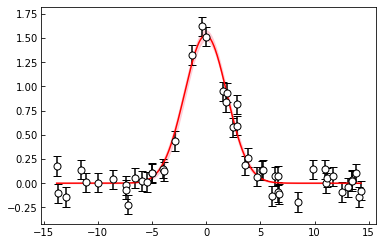

In [7]:
import numpy as np
from fittingclass import chi2

'reduced chi squared: {:.1E}'.format(chi2(testdata, mcmc.function(output.coef, testdata.data['test'].x))/mcmc.DoF)

plt.errorbar(testdata.data['test'].x, testdata.data['test'].y,
             xerr=testdata.data['test'].xerr, yerr=testdata.data['test'].yerr,
             capsize=4, fmt='o', markersize=7, ecolor='black', markeredgecolor = "black", color='w')

x, ymax, ymin = mcmc.calc_range([testdata.data['test'].x.min(), testdata.data['test'].x.max()], nxdata=1000, nsample=1000)
y = mcmc.function(output.coef, x)

plt.plot(x, y, color='red')
plt.fill_between(x, ymax, ymin, color='pink', alpha=0.7)

[2021-12-27 16:51:39,633] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - check_sample:1 -> [START] check_sample


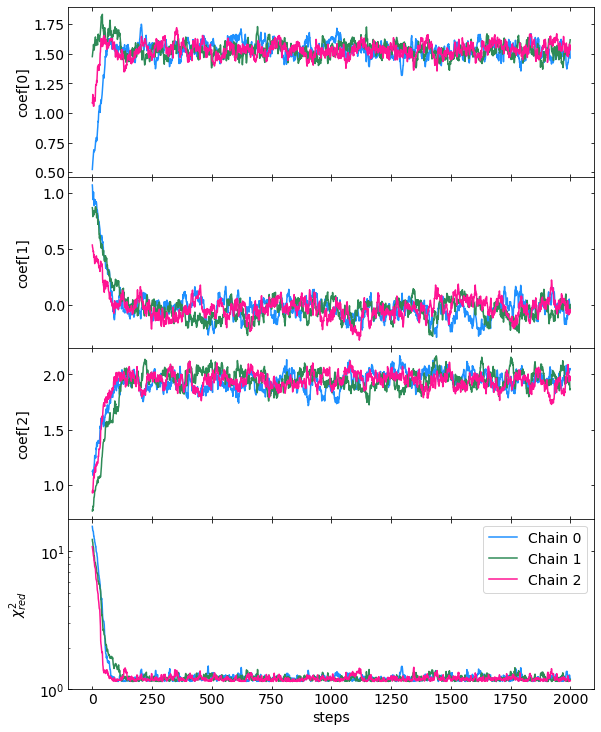

In [14]:
mcmc.check_sample(colors=['dodgerblue', 'seagreen', 'deeppink'], show=True, output='testsample.png', dpi=300)

[2021-12-27 16:49:43,340] INFO	/Volumes/HDD/PythonMCMCSampler/fittingclass.py - check_hist:1 -> [START] check_hist


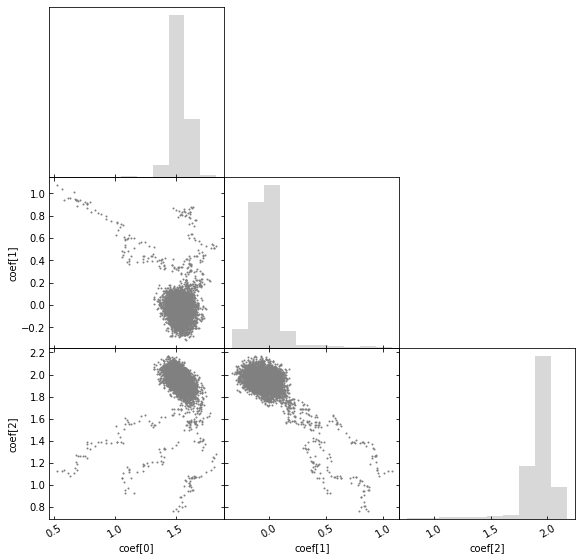

In [8]:
mcmc.check_hist(burnin=0, thinning=1, show=True, output='testhist.png', dpi=300)